# Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/methods/NonLinCFA")
from NonLinCFA import NonLinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_NonLinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,aggregate_unfolded_data_onlyTrain,FS_with_linearWrapper,compare_methods, compute_r2


In [2]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    np.random.shuffle(colors)
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

In [3]:
import tensorflow as tf

print(f'tensorflow version {tf.__version__}')

from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 

import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout


tensorflow version 2.10.0


In [4]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Emiliani1-Emiliani2

## Load data

In [6]:
### targets
path_targets = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/csv_VHI/'
target_df_train_E1,target_df_val_E1,target_df_test_E1,target_df_trainVal_E1 = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', path=path_targets+'Emiliani1.csv')
target_df_train_E2,target_df_val_E2,target_df_test_E2,target_df_trainVal_E2 = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', path=path_targets+'Emiliani2.csv')


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.379890    0.50  2001     1 -0.382765
1    2001-01-13  0.482679    0.58  2001     2  0.319215
2    2001-01-21  0.516259    0.59  2001     3  0.548542
3    2001-01-29  0.434421    0.50  2001     5 -0.010351
4    2001-02-06  0.494805    0.54  2001     6  0.402030
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.427085    0.43  2009    48 -0.060454
407  2009-12-05  0.547380    0.57  2009    49  0.761079
408  2009-12-13  0.531070    0.58  2009    50  0.649694
409  2009-12-21  0.295704    0.00  2009    52 -0.957702
410  2009-12-29  0.027861    0.00  2009    53 -2.786888

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  

In [7]:
### wrapper best 5 features
path_features = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features/'

best5_wrapper_train_E1 = pd.read_csv(path_features+'Emiliani1_nonLinCFA_wrapper_best5_train.csv')
best5_wrapper_val_E1 = pd.read_csv(path_features+'Emiliani1_nonLinCFA_wrapper_best5_val.csv')
best5_wrapper_test_E1 = pd.read_csv(path_features+'Emiliani1_nonLinCFA_wrapper_best5_test.csv')

best5_wrapper_train_E2 = pd.read_csv(path_features+'Emiliani2_nonLinCFA_wrapper_best5_train.csv')
best5_wrapper_val_E2 = pd.read_csv(path_features+'Emiliani2_nonLinCFA_wrapper_best5_val.csv')
best5_wrapper_test_E2 = pd.read_csv(path_features+'Emiliani2_nonLinCFA_wrapper_best5_test.csv')

In [8]:
### CMI features
path_features = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features/'

CMI_train_E1 = pd.read_csv(path_features+'Emiliani1_nonLinCFA_CMI_train.csv')
CMI_val_E1 = pd.read_csv(path_features+'Emiliani1_nonLinCFA_CMI_val.csv')
CMI_test_E1 = pd.read_csv(path_features+'Emiliani1_nonLinCFA_CMI_test.csv')

CMI_train_E2 = pd.read_csv(path_features+'Emiliani2_nonLinCFA_CMI_train.csv')
CMI_val_E2 = pd.read_csv(path_features+'Emiliani2_nonLinCFA_CMI_val.csv')
CMI_test_E2 = pd.read_csv(path_features+'Emiliani2_nonLinCFA_CMI_test.csv')

In [9]:
### CMI best 5 features
path_features = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features/'

best5_CMI_train_E1 = pd.read_csv(path_features+'Emiliani1_nonLinCFA_best5_CMI_train.csv')
best5_CMI_val_E1 = pd.read_csv(path_features+'Emiliani1_nonLinCFA_best5_CMI_val.csv')
best5_CMI_test_E1 = pd.read_csv(path_features+'Emiliani1_nonLinCFA_best5_CMI_test.csv')

best5_CMI_train_E2 = pd.read_csv(path_features+'Emiliani2_nonLinCFA_best5_CMI_train.csv')
best5_CMI_val_E2 = pd.read_csv(path_features+'Emiliani2_nonLinCFA_best5_CMI_val.csv')
best5_CMI_test_E2 = pd.read_csv(path_features+'Emiliani2_nonLinCFA_best5_CMI_test.csv')

## feedforward NN with wrapper

### Emiliani1

In [82]:
model_emiliani1_wrapperBest5 = Sequential()
model_emiliani1_wrapperBest5.add(Dense(5, input_dim=5, activation='relu')) 
model_emiliani1_wrapperBest5.add(Dense(1)) # Output

model_emiliani1_wrapperBest5.compile(loss='mean_absolute_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)

model_emiliani1_wrapperBest5.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


2023-02-01 10:01:40.769632: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-01 10:01:40.770898: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [89]:
model_emiliani1_wrapperBest5.fit(best5_wrapper_train_E1,target_df_train_E1.mean_std,validation_data=(best5_wrapper_val_E1,target_df_val_E1.mean_std),
        callbacks=[monitor],epochs=1000)


Epoch 1/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.6589 - val_loss: 0.6451
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6589 - val_loss: 0.6459
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6592 - val_loss: 0.6463
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6581 - val_loss: 0.6458
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6578 - val_loss: 0.6459
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6574 - val_loss: 0.6458
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6573 - val_loss: 0.6454
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6569 - val_loss: 0.6460
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6567 - val_loss: 0.6457
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6566 - val_loss: 0.6463

In [90]:
r2_score(target_df_test_E1.mean_std, model_emiliani1_wrapperBest5.predict(best5_wrapper_test_E1))

8/8 [==============================] - 0s 3ms/step


2023-02-01 10:05:16.217225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.3041542505571182

### Emiliani2

In [91]:
model_emiliani2_wrapperBest5 = Sequential()
model_emiliani2_wrapperBest5.add(Dense(5, input_dim=5, activation='relu')) 
model_emiliani2_wrapperBest5.add(Dense(1)) # Output

model_emiliani2_wrapperBest5.compile(loss='mean_absolute_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)

model_emiliani2_wrapperBest5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [92]:
model_emiliani2_wrapperBest5.fit(best5_wrapper_train_E2,target_df_train_E2.mean_std,validation_data=(best5_wrapper_val_E2,target_df_val_E2.mean_std),
        callbacks=[monitor],epochs=1000)


Epoch 1/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.7843 - val_loss: 0.7550
Epoch 2/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6532

2023-02-01 10:06:33.435236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-01 10:06:33.588508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 5ms/step - loss: 0.7776 - val_loss: 0.7471
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7722 - val_loss: 0.7403
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7674 - val_loss: 0.7359
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7642 - val_loss: 0.7310
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7611 - val_loss: 0.7263
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7585 - val_loss: 0.7237
Epoch 8/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7565 - val_loss: 0.7209
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7542 - val_loss: 0.7187
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7526 - val_loss: 0.7169
Epoch 11/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7514 - val_loss: 0.7157
Epoch 12/10

13/13 [==============================] - 0s 5ms/step - loss: 0.7045 - val_loss: 0.6556
Epoch 164/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7040 - val_loss: 0.6557
Epoch 165/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7039 - val_loss: 0.6554
Epoch 166/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7039 - val_loss: 0.6577
Epoch 167/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7038 - val_loss: 0.6567
Epoch 168/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7038 - val_loss: 0.6554
Epoch 169/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7034 - val_loss: 0.6559
Epoch 169: early stopping


In [93]:
r2_score(target_df_test_E2.mean_std, model_emiliani2_wrapperBest5.predict(best5_wrapper_test_E2))

8/8 [==============================] - 0s 2ms/step


2023-02-01 10:06:57.197486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.16591095103637798

In [153]:
model_emiliani2_wrapperBest5 = Sequential()
model_emiliani2_wrapperBest5.add(Dense(4, input_dim=12, activation='relu')) 
model_emiliani2_wrapperBest5.add(Dense(1)) # Output

model_emiliani2_wrapperBest5.compile(loss='mean_absolute_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=200, 
        verbose=1, mode='auto', restore_best_weights=True)

model_emiliani2_wrapperBest5.summary()

model_emiliani2_wrapperBest5.fit(CMI_train_E2,target_df_train_E2.mean_std,validation_data=(CMI_val_E2,target_df_val_E2.mean_std),epochs=1000,callbacks=[monitor])

r2_score(target_df_test_E2.mean_std, model_emiliani2_wrapperBest5.predict(CMI_test_E2))


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 4)                 52        
                                                                 
 dense_47 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - ETA: 0s - loss: 1.0964

2023-02-01 10:48:54.189288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-01 10:48:54.353162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 12ms/step - loss: 1.0964 - val_loss: 1.4965
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 1.0148 - val_loss: 1.3574
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.9536 - val_loss: 1.2370
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.9072 - val_loss: 1.1516
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8768 - val_loss: 1.0846
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8534 - val_loss: 1.0262
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8331 - val_loss: 0.9803
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8170 - val_loss: 0.9393
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8056 - val_loss: 0.9088
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7959 - val_loss: 0.8898
Epoch 11/10

13/13 [==============================] - 0s 5ms/step - loss: 0.6270 - val_loss: 0.7131
Epoch 163/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6255 - val_loss: 0.7201
Epoch 164/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6260 - val_loss: 0.7189
Epoch 165/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6252 - val_loss: 0.7164
Epoch 166/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6248 - val_loss: 0.7130
Epoch 167/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6251 - val_loss: 0.7108
Epoch 168/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6243 - val_loss: 0.7178
Epoch 169/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6241 - val_loss: 0.7140
Epoch 170/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6240 - val_loss: 0.7149
Epoch 171/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6236 - val_loss: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.5921 - val_loss: 0.7078
Epoch 323/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5933 - val_loss: 0.7022
Epoch 324/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5916 - val_loss: 0.7069
Epoch 325/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5919 - val_loss: 0.7039
Epoch 326/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5926 - val_loss: 0.7099
Epoch 327/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5918 - val_loss: 0.7014
Epoch 328/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5920 - val_loss: 0.7121
Epoch 329/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5914 - val_loss: 0.7053
Epoch 330/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5911 - val_loss: 0.7065
Epoch 331/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5914 - val_loss: 0.

2023-02-01 10:49:24.924581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.07439536372502698

### Together

In [98]:
model_emiliani12_wrapperBest5 = Sequential()
model_emiliani12_wrapperBest5.add(Dense(5, input_dim=10, activation='relu')) 
model_emiliani12_wrapperBest5.add(Dense(2)) # Output

model_emiliani12_wrapperBest5.compile(loss='mean_absolute_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)

model_emiliani12_wrapperBest5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 2)                 12        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [101]:
best5_wrapper_train_E12 = pd.concat((best5_wrapper_train_E1,best5_wrapper_train_E2),axis=1)
best5_wrapper_val_E12 = pd.concat((best5_wrapper_val_E1,best5_wrapper_val_E2),axis=1)
best5_wrapper_test_E12 = pd.concat((best5_wrapper_test_E1,best5_wrapper_test_E2),axis=1)

target_train_E12 = pd.concat((target_df_train_E1.mean_std,target_df_train_E2.mean_std),axis=1)
target_val_E12 = pd.concat((target_df_val_E1.mean_std,target_df_val_E2.mean_std),axis=1)
target_test_E12 = pd.concat((target_df_test_E1.mean_std,target_df_test_E2.mean_std),axis=1)

model_emiliani12_wrapperBest5.fit(best5_wrapper_train_E12,target_train_E12,validation_data=(best5_wrapper_val_E12,target_val_E12),
        callbacks=[monitor],epochs=1000)


Epoch 1/1000


2023-02-01 10:11:38.444757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 1s 16ms/step - loss: 0.9697 - val_loss: 0.9344
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.9364 - val_loss: 0.9047
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.9078 - val_loss: 0.8797
Epoch 4/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.9573

2023-02-01 10:11:38.956587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 5ms/step - loss: 0.8837 - val_loss: 0.8583
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8633 - val_loss: 0.8416
Epoch 6/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.8472 - val_loss: 0.8291
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8340 - val_loss: 0.8178
Epoch 8/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8220 - val_loss: 0.8081
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8106 - val_loss: 0.7999
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8018 - val_loss: 0.7909
Epoch 11/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7937 - val_loss: 0.7835
Epoch 12/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7867 - val_loss: 0.7765
Epoch 13/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7800 - val_loss: 0.7713
Epoch 14/

In [107]:
res = model_emiliani12_wrapperBest5.predict(best5_wrapper_test_E12)

print(r2_score(target_df_test_E1.mean_std, res[:,0]))
print(r2_score(target_df_test_E2.mean_std, res[:,1]))


8/8 [==============================] - 0s 3ms/step
0.13858849170586363
0.04033818912352716


## feedforward NN with CMI

### Emiliani1

In [111]:
model_emiliani1_CMI = Sequential()
model_emiliani1_CMI.add(Dense(5, input_dim=6, activation='relu')) 
model_emiliani1_CMI.add(Dense(1)) # Output

model_emiliani1_CMI.compile(loss='mean_absolute_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)

model_emiliani1_CMI.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 5)                 35        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [112]:
model_emiliani1_CMI.fit(CMI_train_E1,target_df_train_E1.mean_std,validation_data=(CMI_val_E1,target_df_val_E1.mean_std),
        callbacks=[monitor],epochs=1000)


Epoch 1/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.8032 - val_loss: 1.0234
Epoch 2/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6544

2023-02-01 10:17:47.411090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-01 10:17:47.561985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 6ms/step - loss: 0.7866 - val_loss: 0.9913
Epoch 3/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.7745 - val_loss: 0.9581
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7629 - val_loss: 0.9315
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7540 - val_loss: 0.9070
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7464 - val_loss: 0.8842
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7400 - val_loss: 0.8635
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7349 - val_loss: 0.8444
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7296 - val_loss: 0.8327
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7260 - val_loss: 0.8198
Epoch 11/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7223 - val_loss: 0.8099
Epoch 12/10

In [113]:
r2_score(target_df_test_E1.mean_std, model_emiliani1_CMI.predict(CMI_test_E1))

8/8 [==============================] - 0s 2ms/step


2023-02-01 10:18:11.989475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.18709398689292256

### Emiliani2

In [142]:
model_emiliani2_CMI = Sequential()
model_emiliani2_CMI.add(Dense(5, input_dim=12, activation='relu')) 
model_emiliani2_CMI.add(Dense(1)) # Output

model_emiliani2_CMI.compile(loss='mean_absolute_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)

model_emiliani2_CMI.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 5)                 65        
                                                                 
 dense_31 (Dense)            (None, 1)                 6         
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [143]:
model_emiliani2_CMI.fit(CMI_train_E2,target_df_train_E2.mean_std,validation_data=(CMI_val_E2,target_df_val_E2.mean_std),
        callbacks=[monitor],epochs=1000)


Epoch 1/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.9858 - val_loss: 0.8875
Epoch 2/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.7841

2023-02-01 10:39:19.776018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-01 10:39:19.918607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 5ms/step - loss: 0.9429 - val_loss: 0.8642
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.9069 - val_loss: 0.8439
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8753 - val_loss: 0.8280
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8542 - val_loss: 0.8152
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8374 - val_loss: 0.8067
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8247 - val_loss: 0.7950
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8143 - val_loss: 0.7855
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8066 - val_loss: 0.7770
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7999 - val_loss: 0.7673
Epoch 11/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7927 - val_loss: 0.7623
Epoch 12/10

In [144]:
r2_score(target_df_test_E2.mean_std, model_emiliani2_CMI.predict(CMI_test_E2))

8/8 [==============================] - 0s 2ms/step


2023-02-01 10:39:24.127706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.2523916814140521

### Together

In [119]:
model_emiliani12_CMI = Sequential()
model_emiliani12_CMI.add(Dense(5, input_dim=18, activation='relu')) 
model_emiliani12_CMI.add(Dense(2)) # Output

model_emiliani12_CMI.compile(loss='mean_absolute_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)

model_emiliani12_CMI.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 5)                 95        
                                                                 
 dense_15 (Dense)            (None, 2)                 12        
                                                                 
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


In [120]:
CMI_train_E12 = pd.concat((CMI_train_E1,CMI_train_E2),axis=1)
CMI_val_E12 = pd.concat((CMI_val_E1,CMI_val_E2),axis=1)
CMI_test_E12 = pd.concat((CMI_test_E1,CMI_test_E2),axis=1)

target_train_E12 = pd.concat((target_df_train_E1.mean_std,target_df_train_E2.mean_std),axis=1)
target_val_E12 = pd.concat((target_df_val_E1.mean_std,target_df_val_E2.mean_std),axis=1)
target_test_E12 = pd.concat((target_df_test_E1.mean_std,target_df_test_E2.mean_std),axis=1)

model_emiliani12_CMI.fit(CMI_train_E12,target_train_E12,validation_data=(CMI_val_E12,target_val_E12),
        callbacks=[monitor],epochs=1000)


Epoch 1/1000
13/13 [==============================] - ETA: 0s - loss: 0.9050

2023-02-01 10:21:57.149898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-01 10:21:57.319303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 13ms/step - loss: 0.9050 - val_loss: 1.1153
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8695 - val_loss: 1.0542
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8426 - val_loss: 1.0049
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8225 - val_loss: 0.9554
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8055 - val_loss: 0.9124
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7917 - val_loss: 0.8862
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7804 - val_loss: 0.8606
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7698 - val_loss: 0.8344
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7594 - val_loss: 0.8116
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7522 - val_loss: 0.7901
Epoch 11/10

In [121]:
res = model_emiliani12_CMI.predict(CMI_test_E12)

print(r2_score(target_df_test_E1.mean_std, res[:,0]))
print(r2_score(target_df_test_E2.mean_std, res[:,1]))


8/8 [==============================] - 0s 2ms/step
0.06809134446862464
0.04497803527098665


2023-02-01 10:22:18.815802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


## feedforward NN with CMI best 5

### Emiliani1

In [25]:
model_emiliani1_CMI_best5 = Sequential()
model_emiliani1_CMI_best5.add(Dense(5, input_dim=5, activation='relu')) 
model_emiliani1_CMI_best5.add(Dense(1)) # Output

model_emiliani1_CMI_best5.compile(loss='mean_absolute_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=100, 
        verbose=1, mode='auto', restore_best_weights=True)

model_emiliani1_CMI_best5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_emiliani1_CMI_best5.fit(best5_CMI_train_E1,target_df_train_E1.mean_std,validation_data=(best5_CMI_val_E1,target_df_val_E1.mean_std),
        callbacks=[monitor],epochs=1000)


Epoch 1/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.8526 - val_loss: 1.0863
Epoch 2/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.8534

2023-02-13 14:16:22.424875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 14:16:22.570913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 6ms/step - loss: 0.8273 - val_loss: 1.0323
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8047 - val_loss: 0.9817
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7867 - val_loss: 0.9379
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7725 - val_loss: 0.9026
Epoch 6/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7628 - val_loss: 0.8717
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7549 - val_loss: 0.8470
Epoch 8/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7483 - val_loss: 0.8248
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7411 - val_loss: 0.8094
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7367 - val_loss: 0.7892
Epoch 11/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7325 - val_loss: 0.7734
Epoch 12/10

13/13 [==============================] - 0s 5ms/step - loss: 0.6310 - val_loss: 0.6598
Epoch 164/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6307 - val_loss: 0.6552
Epoch 165/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6313 - val_loss: 0.6580
Epoch 166/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6303 - val_loss: 0.6557
Epoch 167/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6305 - val_loss: 0.6546
Epoch 168/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6569
Epoch 169/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6302 - val_loss: 0.6596
Epoch 170/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6303 - val_loss: 0.6571
Epoch 171/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6304 - val_loss: 0.6592
Epoch 172/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6301 - val_loss: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.6157 - val_loss: 0.6426
Epoch 324/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6157 - val_loss: 0.6428
Epoch 325/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6153 - val_loss: 0.6430
Epoch 326/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6156 - val_loss: 0.6427
Epoch 327/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6152 - val_loss: 0.6419
Epoch 328/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6154 - val_loss: 0.6426
Epoch 329/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6153 - val_loss: 0.6444
Epoch 330/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6152 - val_loss: 0.6444
Epoch 331/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6155 - val_loss: 0.6413
Epoch 332/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6149 - val_loss: 0.

13/13 [==============================] - 0s 5ms/step - loss: 0.6081 - val_loss: 0.6510
Epoch 484/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6078 - val_loss: 0.6514
Epoch 485/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6076 - val_loss: 0.6493
Epoch 486/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6076 - val_loss: 0.6451
Epoch 487/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6082 - val_loss: 0.6460
Epoch 488/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6079 - val_loss: 0.6448
Epoch 489/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6076 - val_loss: 0.6476
Epoch 490/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6078 - val_loss: 0.6506
Epoch 491/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6077 - val_loss: 0.6475
Epoch 492/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6074 - val_loss: 0.

In [27]:
r2_score(target_df_test_E1.mean_std, model_emiliani1_CMI_best5.predict(best5_CMI_test_E1))

8/8 [==============================] - 0s 2ms/step


2023-02-13 14:16:56.773016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.2524697745336094

### Emiliani2

In [28]:
model_emiliani2_CMI_best5 = Sequential()
model_emiliani2_CMI_best5.add(Dense(5, input_dim=5, activation='relu')) 
model_emiliani2_CMI_best5.add(Dense(1)) # Output

model_emiliani2_CMI_best5.compile(loss='mean_absolute_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=100, 
        verbose=1, mode='auto', restore_best_weights=True)

model_emiliani2_CMI_best5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 30        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_emiliani2_CMI_best5.fit(best5_CMI_train_E2,target_df_train_E2.mean_std,validation_data=(best5_CMI_val_E2,target_df_val_E2.mean_std),
        callbacks=[monitor],epochs=1000)


Epoch 1/1000
13/13 [==============================] - 0s 11ms/step - loss: 1.0360 - val_loss: 0.9248
Epoch 2/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.9788

2023-02-13 14:17:06.486447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 14:17:06.638054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 6ms/step - loss: 1.0047 - val_loss: 0.8981
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.9747 - val_loss: 0.8766
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.9489 - val_loss: 0.8571
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.9249 - val_loss: 0.8387
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.9038 - val_loss: 0.8229
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8847 - val_loss: 0.8085
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8681 - val_loss: 0.7945
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8521 - val_loss: 0.7816
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8385 - val_loss: 0.7690
Epoch 11/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.8245 - val_loss: 0.7583
Epoch 12/10

In [30]:
r2_score(target_df_test_E2.mean_std, model_emiliani2_CMI_best5.predict(best5_CMI_test_E2))

8/8 [==============================] - 0s 2ms/step


2023-02-13 14:17:16.161300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0.2570693400412608

### Together

In [31]:
model_emiliani12_CMI_best5 = Sequential()
model_emiliani12_CMI_best5.add(Dense(5, input_dim=10, activation='relu')) 
model_emiliani12_CMI_best5.add(Dense(2)) # Output

model_emiliani12_CMI_best5.compile(loss='mean_absolute_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=100, 
        verbose=1, mode='auto', restore_best_weights=True)

model_emiliani12_CMI_best5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 2)                 12        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [32]:
best5_CMI_train_E12 = pd.concat((best5_CMI_train_E1,best5_CMI_train_E2),axis=1)
best5_CMI_val_E12 = pd.concat((best5_CMI_val_E1,best5_CMI_val_E2),axis=1)
best5_CMI_test_E12 = pd.concat((best5_CMI_test_E1,best5_CMI_test_E2),axis=1)

target_train_E12 = pd.concat((target_df_train_E1.mean_std,target_df_train_E2.mean_std),axis=1)
target_val_E12 = pd.concat((target_df_val_E1.mean_std,target_df_val_E2.mean_std),axis=1)
target_test_E12 = pd.concat((target_df_test_E1.mean_std,target_df_test_E2.mean_std),axis=1)

model_emiliani12_CMI_best5.fit(best5_CMI_train_E12,target_train_E12,validation_data=(best5_CMI_val_E12,target_val_E12),
        callbacks=[monitor],epochs=1000)


Epoch 1/1000
13/13 [==============================] - 1s 12ms/step - loss: 0.8394 - val_loss: 0.8951
Epoch 2/1000


2023-02-13 14:17:28.995569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 14:17:29.147892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 6ms/step - loss: 0.8057 - val_loss: 0.8407
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7803 - val_loss: 0.7987
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7640 - val_loss: 0.7626
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7537 - val_loss: 0.7389
Epoch 6/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7463 - val_loss: 0.7293
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7417 - val_loss: 0.7219
Epoch 8/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7384 - val_loss: 0.7156
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7344 - val_loss: 0.7103
Epoch 10/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7315 - val_loss: 0.7077
Epoch 11/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.7285 - val_loss: 0.7023
Epoch 12/10

In [33]:
res = model_emiliani12_CMI_best5.predict(best5_CMI_test_E12)

print(r2_score(target_df_test_E1.mean_std, res[:,0]))
print(r2_score(target_df_test_E2.mean_std, res[:,1]))


8/8 [==============================] - 0s 2ms/step
0.2646020300846088
0.2860979483350553


2023-02-13 14:17:55.725250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


### Together, another structure

In [71]:
model_both_CMI_best5 = Sequential()
model_both_CMI_best5.add(Dense(5, input_dim=6, activation='relu')) 
model_both_CMI_best5.add(Dense(1)) # Output

model_both_CMI_best5.compile(loss='mean_absolute_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=100, 
        verbose=1, mode='auto', restore_best_weights=True)

model_both_CMI_best5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 5)                 35        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [66]:
best5_CMI_train_withClass0 = pd.concat((best5_CMI_train_E1,pd.DataFrame(np.zeros(len(best5_CMI_train_E1)),columns=['basin'])),axis=1)
best5_CMI_train_withClass1 = pd.concat((best5_CMI_train_E2,pd.DataFrame(np.ones(len(best5_CMI_train_E1)),columns=['basin'])),axis=1)
best5_CMI_train_withClass01 = np.concatenate((best5_CMI_train_withClass0.values,best5_CMI_train_withClass1.values))


In [52]:
best5_CMI_val_withClass0 = pd.concat((best5_CMI_val_E1,pd.DataFrame(np.zeros(len(best5_CMI_val_E1)),columns=['basin'])),axis=1)
best5_CMI_val_withClass1 = pd.concat((best5_CMI_val_E2,pd.DataFrame(np.ones(len(best5_CMI_val_E1)),columns=['basin'])),axis=1)
best5_CMI_val_withClass01 = np.concatenate((best5_CMI_val_withClass0.values,best5_CMI_val_withClass1.values))


In [54]:
best5_CMI_test_withClass0 = pd.concat((best5_CMI_test_E1,pd.DataFrame(np.zeros(len(best5_CMI_test_E1)),columns=['basin'])),axis=1)
best5_CMI_test_withClass1 = pd.concat((best5_CMI_test_E2,pd.DataFrame(np.ones(len(best5_CMI_test_E1)),columns=['basin'])),axis=1)
best5_CMI_test_withClass01 = np.concatenate((best5_CMI_test_withClass0.values,best5_CMI_test_withClass1.values))


In [58]:
target_train_withClass01 = pd.concat((target_df_train_E1.mean_std,target_df_train_E2.mean_std),axis=0)
target_val_withClass01 = pd.concat((target_df_val_E1.mean_std,target_df_val_E2.mean_std),axis=0)
target_test_withClass01 = pd.concat((target_df_test_E1.mean_std,target_df_test_E2.mean_std),axis=0)


In [68]:
model_both_CMI_best5.fit(best5_CMI_train_withClass01,target_train_withClass01,validation_data=(best5_CMI_val_withClass01,target_val_withClass01),
        callbacks=[monitor],epochs=1000)


Epoch 1/1000


2023-02-13 14:45:09.461116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 1s 12ms/step - loss: 1.0354 - val_loss: 0.9807
Epoch 2/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.9517 - val_loss: 0.9125
Epoch 3/1000
 1/26 [>.............................] - ETA: 0s - loss: 0.9551

2023-02-13 14:45:10.209832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 0s 5ms/step - loss: 0.8976 - val_loss: 0.8774
Epoch 4/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.8628 - val_loss: 0.8597
Epoch 5/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.8423 - val_loss: 0.8472
Epoch 6/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.8291 - val_loss: 0.8396
Epoch 7/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.8193 - val_loss: 0.8338
Epoch 8/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.8123 - val_loss: 0.8301
Epoch 9/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.8056 - val_loss: 0.8253
Epoch 10/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.8006 - val_loss: 0.8215
Epoch 11/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.7954 - val_loss: 0.8166
Epoch 12/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.7901 - val_loss: 0.8124
Epoch 13/1

26/26 [==============================] - 0s 5ms/step - loss: 0.6551 - val_loss: 0.6456
Epoch 165/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6550 - val_loss: 0.6453
Epoch 166/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6553 - val_loss: 0.6453
Epoch 167/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6547 - val_loss: 0.6451
Epoch 168/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6549 - val_loss: 0.6452
Epoch 169/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6547 - val_loss: 0.6445
Epoch 170/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6547 - val_loss: 0.6439
Epoch 171/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6544 - val_loss: 0.6451
Epoch 172/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6544 - val_loss: 0.6443
Epoch 173/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6543 - val_loss: 0.

26/26 [==============================] - 0s 5ms/step - loss: 0.6487 - val_loss: 0.6420
Epoch 325/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6483 - val_loss: 0.6409
Epoch 326/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6485 - val_loss: 0.6405
Epoch 327/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6481 - val_loss: 0.6410
Epoch 328/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6486 - val_loss: 0.6405
Epoch 329/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6481 - val_loss: 0.6404
Epoch 330/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6484 - val_loss: 0.6405
Epoch 331/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6482 - val_loss: 0.6396
Epoch 332/1000
26/26 [==============================] - 0s 4ms/step - loss: 0.6485 - val_loss: 0.6419
Epoch 333/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6483 - val_loss: 0.

In [69]:
res0 = model_both_CMI_best5.predict(best5_CMI_test_withClass0.values)
res1 = model_both_CMI_best5.predict(best5_CMI_test_withClass1.values)

print(r2_score(target_df_test_E1.mean_std, res0))
print(r2_score(target_df_test_E2.mean_std, res1))


8/8 [==============================] - 0s 1ms/step
0.2557372464499036
0.2790083231613376


2023-02-13 14:48:07.285909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


### one additional feature 

In [91]:
model_both_CMI_best5 = Sequential()
model_both_CMI_best5.add(Dense(15, input_dim=12, activation='relu')) 
model_both_CMI_best5.add(Dense(1)) # Output

model_both_CMI_best5.compile(loss='mean_absolute_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=100, 
        verbose=1, mode='auto', restore_best_weights=True)

model_both_CMI_best5.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 15)                195       
                                                                 
 dense_29 (Dense)            (None, 1)                 16        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [113]:
best5_CMI_train_withClass0 = pd.concat((best5_CMI_train_E1,best5_CMI_train_E2,pd.DataFrame(np.zeros(len(best5_CMI_train_E1)),columns=['basin']),pd.DataFrame(np.zeros(len(best5_CMI_train_E1)),columns=['basin2'])),axis=1)
best5_CMI_train_withClass1 = pd.concat((best5_CMI_train_E1,best5_CMI_train_E2,pd.DataFrame(np.ones(len(best5_CMI_train_E1)),columns=['basin']),pd.DataFrame(np.ones(len(best5_CMI_train_E1)),columns=['basin2'])),axis=1)
best5_CMI_train_withClass01 = np.concatenate((best5_CMI_train_withClass0.values,best5_CMI_train_withClass1.values))


In [114]:
best5_CMI_val_withClass0 = pd.concat((best5_CMI_val_E1,best5_CMI_val_E2,pd.DataFrame(np.zeros(len(best5_CMI_val_E1)),columns=['basin2']),pd.DataFrame(np.zeros(len(best5_CMI_val_E1)),columns=['basin'])),axis=1)
best5_CMI_val_withClass1 = pd.concat((best5_CMI_val_E1,best5_CMI_val_E2,pd.DataFrame(np.ones(len(best5_CMI_val_E1)),columns=['basin2']),pd.DataFrame(np.ones(len(best5_CMI_val_E1)),columns=['basin'])),axis=1)
best5_CMI_val_withClass01 = np.concatenate((best5_CMI_val_withClass0.values,best5_CMI_val_withClass1.values))


In [115]:
best5_CMI_test_withClass0 = pd.concat((best5_CMI_test_E1,best5_CMI_test_E2,pd.DataFrame(np.zeros(len(best5_CMI_test_E1)),columns=['basin']),pd.DataFrame(np.zeros(len(best5_CMI_test_E1)),columns=['basin2'])),axis=1)
best5_CMI_test_withClass1 = pd.concat((best5_CMI_test_E1,best5_CMI_test_E2,pd.DataFrame(np.ones(len(best5_CMI_test_E1)),columns=['basin']),pd.DataFrame(np.ones(len(best5_CMI_test_E1)),columns=['basin2'])),axis=1)
best5_CMI_test_withClass01 = np.concatenate((best5_CMI_test_withClass0.values,best5_CMI_test_withClass1.values))


In [93]:
target_train_withClass01 = pd.concat((target_df_train_E1.mean_std,target_df_train_E2.mean_std),axis=0)
target_val_withClass01 = pd.concat((target_df_val_E1.mean_std,target_df_val_E2.mean_std),axis=0)
target_test_withClass01 = pd.concat((target_df_test_E1.mean_std,target_df_test_E2.mean_std),axis=0)


In [116]:
model_both_CMI_best5.fit(best5_CMI_train_withClass01,target_train_withClass01,validation_data=(best5_CMI_val_withClass01,target_val_withClass01),
        callbacks=[monitor],epochs=1000)


Epoch 1/1000
26/26 [==============================] - 0s 6ms/step - loss: 0.6599 - val_loss: 0.6987
Epoch 2/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6587 - val_loss: 0.6995
Epoch 3/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6555 - val_loss: 0.7014
Epoch 4/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6534 - val_loss: 0.6984
Epoch 5/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6520 - val_loss: 0.7005
Epoch 6/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6513 - val_loss: 0.7000
Epoch 7/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6497 - val_loss: 0.7049
Epoch 8/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6494 - val_loss: 0.7057
Epoch 9/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6471 - val_loss: 0.7085
Epoch 10/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6449 - val_loss: 0.7052

In [117]:
res0 = model_both_CMI_best5.predict(best5_CMI_test_withClass0.values)
res1 = model_both_CMI_best5.predict(best5_CMI_test_withClass1.values)

print(r2_score(target_df_test_E1.mean_std, res0))
print(r2_score(target_df_test_E2.mean_std, res1))


8/8 [==============================] - 0s 2ms/step
0.14092015375049294
0.11483063130551474


### additive linear regression 

In [141]:
best5_CMI_train_withClass0 = pd.concat((best5_CMI_train_E1,best5_CMI_train_E2,pd.DataFrame(np.zeros(len(best5_CMI_train_E1)),columns=['basin']),pd.DataFrame(np.ones(len(best5_CMI_train_E1)),columns=['basin2'])),axis=1)
best5_CMI_train_withClass1 = pd.concat((best5_CMI_train_E1,best5_CMI_train_E2,pd.DataFrame(np.ones(len(best5_CMI_train_E1)),columns=['basin']),pd.DataFrame(np.zeros(len(best5_CMI_train_E1)),columns=['basin2'])),axis=1)
best5_CMI_train_withClass01 = pd.concat((best5_CMI_train_withClass0,best5_CMI_train_withClass1),axis=0)
best5_CMI_train_withClass01

,cyclostationary_mean_rr_4w_0,cyclostationary_mean_tg_1w_4,cyclostationary_mean_rr_12w_1,cyclostationary_mean_rr_8w_1,cyclostationary_mean_tg_9,cyclostationary_mean_tg_1w_4,cyclostationary_mean_rr_4w_3,cyclostationary_mean_tg_4,cyclostationary_mean_rr_8w_0,cyclostationary_mean_rr_12w_1,basin,basin2
0,2.112078,0.345989,1.690770,3.965287,0.268224,-0.415835,0.733822,-0.736407,2.581050,1.579481,0.0,1.0
1,1.404523,1.128851,1.865833,1.655892,0.977612,0.237307,0.849889,0.294888,2.460299,1.146518,0.0,1.0
2,1.162736,0.786460,1.429151,1.672157,-0.780151,-0.259989,0.518355,-1.191392,1.657472,0.697926,0.0,1.0
3,0.861999,0.564161,0.611897,1.593990,0.408553,-0.565851,0.239497,0.067063,1.600489,0.578318,0.0,1.0
4,1.461930,0.604584,4.150391,1.782496,-0.260577,-0.187005,0.696217,-0.894857,1.249495,0.843396,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.211596,0.739113,-0.281990,-0.636426,1.599630,1.352614,-0.220555,0.471800,-0.187672,-0.422427,1.0,0.0
407,-0.765747,0.855313,-0.234571,-1.204469,0.920235,1.040390,0.346445,0.034058,-0.358316,-0.518833,1.0,0.0
408,-0.609296,0.697286,-0.562017,-1.089158,0.341994,0.830698,0.429694,0.796373,-0.106524,-0.588942,1.0,0.0
409,-0.836849,-0.719738,-0.028118,-0.925439,-1.523290,-0.631908,-0.434877,-2.562406,-0.028237,-0.468533,1.0,0.0


In [142]:
best5_CMI_val_withClass0 = pd.concat((best5_CMI_val_E1,best5_CMI_val_E2,pd.DataFrame(np.zeros(len(best5_CMI_val_E1)),columns=['basin']),pd.DataFrame(np.ones(len(best5_CMI_val_E1)),columns=['basin2'])),axis=1)
best5_CMI_val_withClass1 = pd.concat((best5_CMI_val_E1,best5_CMI_val_E2,pd.DataFrame(np.ones(len(best5_CMI_val_E1)),columns=['basin']),pd.DataFrame(np.zeros(len(best5_CMI_val_E1)),columns=['basin2'])),axis=1)
best5_CMI_val_withClass01 = pd.concat((best5_CMI_val_withClass0,best5_CMI_val_withClass1),axis=0)

best5_CMI_test_withClass0 = pd.concat((best5_CMI_test_E1,best5_CMI_test_E2,pd.DataFrame(np.zeros(len(best5_CMI_test_E1)),columns=['basin']),pd.DataFrame(np.ones(len(best5_CMI_val_E1)),columns=['basin2'])),axis=1)
best5_CMI_test_withClass1 = pd.concat((best5_CMI_test_E1,best5_CMI_test_E2,pd.DataFrame(np.ones(len(best5_CMI_test_E1)),columns=['basin']),pd.DataFrame(np.zeros(len(best5_CMI_val_E1)),columns=['basin2'])),axis=1)
best5_CMI_test_withClass01 = pd.concat((best5_CMI_test_withClass0,best5_CMI_test_withClass1),axis=0)


In [143]:
target_train_withClass01 = pd.concat((target_df_train_E1.mean_std,target_df_train_E2.mean_std),axis=0)
target_val_withClass01 = pd.concat((target_df_val_E1.mean_std,target_df_val_E2.mean_std),axis=0)
target_test_withClass01 = pd.concat((target_df_test_E1.mean_std,target_df_test_E2.mean_std),axis=0)


In [144]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(pd.concat((best5_CMI_train_withClass01,best5_CMI_val_withClass01)),pd.concat((target_train_withClass01,target_val_withClass01)))


LinearRegression()

In [145]:
res0 = model.predict(best5_CMI_test_withClass0.values)
res1 = model.predict(best5_CMI_test_withClass1.values)

print(r2_score(target_df_test_E1.mean_std, res0))
print(r2_score(target_df_test_E2.mean_std, res1))


0.34484914195705985
0.2496609343242968


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [146]:
model.coef_

array([ 0.23585931, -0.11134115,  0.17230418, -0.0261571 , -0.14259048,
        0.06147449,  0.08651069, -0.13714384,  0.04001579, -0.03765344,
        0.0128004 , -0.0128004 ])

In [154]:
model.intercept_

-0.00598513085606607

In [150]:
model0 = LinearRegression()
model0.fit(pd.concat((best5_CMI_train_E1,best5_CMI_val_E1)),pd.concat((target_df_train_E1.mean_std,target_df_val_E1.mean_std)))
res00 = model0.predict(best5_CMI_test_E1)
print(r2_score(target_df_test_E1.mean_std, res00))


0.3364734050935926


In [152]:
model0.coef_

array([ 0.33220598, -0.09123719,  0.18002624,  0.0414309 , -0.24917049])

In [153]:
model0.intercept_

-0.009909447498446716

In [151]:
model1 = LinearRegression()
model1.fit(pd.concat((best5_CMI_train_E2,best5_CMI_val_E2)),pd.concat((target_df_train_E2.mean_std,target_df_val_E2.mean_std)))
res11 = model1.predict(best5_CMI_test_E2)
print(r2_score(target_df_test_E2.mean_std, res11))


0.23062800854005472


In [157]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(pd.concat((best5_CMI_train_withClass01.iloc[:,:-2],best5_CMI_val_withClass01.iloc[:,:-2])),pd.concat((target_train_withClass01,target_val_withClass01)))


LinearRegression()

In [158]:
res0_noclass = model.predict(best5_CMI_test_withClass0.iloc[:,:-2].values)
res1_noclasss1 = model.predict(best5_CMI_test_withClass1.iloc[:,:-2].values)

print(r2_score(target_df_test_E1.mean_std, res0_noclass))
print(r2_score(target_df_test_E2.mean_std, res1_noclasss1))


0.34785910131234443
0.24779119186940968


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [160]:
model.intercept_

-0.005985130856066084

In [164]:
from sklearn.linear_model import LinearRegression
model_only0 = LinearRegression()
model_only0.fit(pd.concat((best5_CMI_train_withClass0.iloc[:,:-2],best5_CMI_val_withClass0.iloc[:,:-2])),pd.concat((target_df_train_E1.mean_std,target_df_val_E1.mean_std)))


LinearRegression()

In [165]:
res_only0 = model_only0.predict(best5_CMI_test_withClass0.iloc[:,:-2].values)
print(r2_score(target_df_test_E1.mean_std, res_only0))

0.3471864948497688


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import LinearRegression
model_only0 = LinearRegression()
model_only0.fit(pd.concat((best5_CMI_train_withClass0.iloc[:,:-2],best5_CMI_val_withClass0.iloc[:,:-2])),pd.concat((target_df_train_E1.mean_std,target_df_val_E1.mean_std)))


In [ ]:
from sklearn.linear_model import LinearRegression
model_only0 = LinearRegression()
model_only0.fit(pd.concat((best5_CMI_train_withClass0.iloc[:,:-2],best5_CMI_val_withClass0.iloc[:,:-2])),pd.concat((target_df_train_E1.mean_std,target_df_val_E1.mean_std)))


In [166]:
### metto anche tutte le interazioni

In [201]:
best5_CMI_train_withClass0 = pd.concat((best5_CMI_train_E1.add_suffix('_basin'),best5_CMI_train_E2.add_suffix('_basin2'),pd.DataFrame(np.zeros(len(best5_CMI_train_E1)),columns=['basin']),pd.DataFrame(np.ones(len(best5_CMI_train_E1)),columns=['basin2'])),axis=1)
best5_CMI_train_withClass1 = pd.concat((best5_CMI_train_E1.add_suffix('_basin'),best5_CMI_train_E2.add_suffix('_basin2'),pd.DataFrame(np.ones(len(best5_CMI_train_E1)),columns=['basin']),pd.DataFrame(np.zeros(len(best5_CMI_train_E1)),columns=['basin2'])),axis=1)
best5_CMI_train_withClass01 = pd.concat((best5_CMI_train_withClass0,best5_CMI_train_withClass1),axis=0)
best5_CMI_train_withClass01

,cyclostationary_mean_rr_4w_0_basin,cyclostationary_mean_tg_1w_4_basin,cyclostationary_mean_rr_12w_1_basin,cyclostationary_mean_rr_8w_1_basin,cyclostationary_mean_tg_9_basin,cyclostationary_mean_tg_1w_4_basin2,cyclostationary_mean_rr_4w_3_basin2,cyclostationary_mean_tg_4_basin2,cyclostationary_mean_rr_8w_0_basin2,cyclostationary_mean_rr_12w_1_basin2,basin,basin2
0,2.112078,0.345989,1.690770,3.965287,0.268224,-0.415835,0.733822,-0.736407,2.581050,1.579481,0.0,1.0
1,1.404523,1.128851,1.865833,1.655892,0.977612,0.237307,0.849889,0.294888,2.460299,1.146518,0.0,1.0
2,1.162736,0.786460,1.429151,1.672157,-0.780151,-0.259989,0.518355,-1.191392,1.657472,0.697926,0.0,1.0
3,0.861999,0.564161,0.611897,1.593990,0.408553,-0.565851,0.239497,0.067063,1.600489,0.578318,0.0,1.0
4,1.461930,0.604584,4.150391,1.782496,-0.260577,-0.187005,0.696217,-0.894857,1.249495,0.843396,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.211596,0.739113,-0.281990,-0.636426,1.599630,1.352614,-0.220555,0.471800,-0.187672,-0.422427,1.0,0.0
407,-0.765747,0.855313,-0.234571,-1.204469,0.920235,1.040390,0.346445,0.034058,-0.358316,-0.518833,1.0,0.0
408,-0.609296,0.697286,-0.562017,-1.089158,0.341994,0.830698,0.429694,0.796373,-0.106524,-0.588942,1.0,0.0
409,-0.836849,-0.719738,-0.028118,-0.925439,-1.523290,-0.631908,-0.434877,-2.562406,-0.028237,-0.468533,1.0,0.0


In [213]:
best5_CMI_val_withClass0 = pd.concat((best5_CMI_val_E1.add_suffix('_basin'),best5_CMI_val_E2.add_suffix('_basin2'),pd.DataFrame(np.zeros(len(best5_CMI_val_E1)),columns=['basin']),pd.DataFrame(np.ones(len(best5_CMI_val_E1)),columns=['basin2'])),axis=1)
best5_CMI_val_withClass1 = pd.concat((best5_CMI_val_E1.add_suffix('_basin'),best5_CMI_val_E2.add_suffix('_basin2'),pd.DataFrame(np.ones(len(best5_CMI_val_E1)),columns=['basin']),pd.DataFrame(np.zeros(len(best5_CMI_val_E1)),columns=['basin2'])),axis=1)
best5_CMI_val_withClass01 = pd.concat((best5_CMI_val_withClass0,best5_CMI_val_withClass1),axis=0)

best5_CMI_test_withClass0 = pd.concat((best5_CMI_test_E1.add_suffix('_basin'),best5_CMI_test_E2.add_suffix('_basin2'),pd.DataFrame(np.zeros(len(best5_CMI_test_E1)),columns=['basin']),pd.DataFrame(np.ones(len(best5_CMI_val_E1)),columns=['basin2'])),axis=1)
best5_CMI_test_withClass1 = pd.concat((best5_CMI_test_E1.add_suffix('_basin'),best5_CMI_test_E2.add_suffix('_basin2'),pd.DataFrame(np.ones(len(best5_CMI_test_E1)),columns=['basin']),pd.DataFrame(np.zeros(len(best5_CMI_val_E1)),columns=['basin2'])),axis=1)
best5_CMI_test_withClass01 = pd.concat((best5_CMI_test_withClass0,best5_CMI_test_withClass1),axis=0)


In [204]:
df_trainVal = pd.concat((best5_CMI_train_withClass01,best5_CMI_val_withClass01))
df_trainVal

,cyclostationary_mean_rr_4w_0_basin,cyclostationary_mean_tg_1w_4_basin,cyclostationary_mean_rr_12w_1_basin,cyclostationary_mean_rr_8w_1_basin,cyclostationary_mean_tg_9_basin,cyclostationary_mean_tg_1w_4_basin2,cyclostationary_mean_rr_4w_3_basin2,cyclostationary_mean_tg_4_basin2,cyclostationary_mean_rr_8w_0_basin2,cyclostationary_mean_rr_12w_1_basin2,basin,basin2
0,2.112078,0.345989,1.690770,3.965287,0.268224,-0.415835,0.733822,-0.736407,2.581050,1.579481,0.0,1.0
1,1.404523,1.128851,1.865833,1.655892,0.977612,0.237307,0.849889,0.294888,2.460299,1.146518,0.0,1.0
2,1.162736,0.786460,1.429151,1.672157,-0.780151,-0.259989,0.518355,-1.191392,1.657472,0.697926,0.0,1.0
3,0.861999,0.564161,0.611897,1.593990,0.408553,-0.565851,0.239497,0.067063,1.600489,0.578318,0.0,1.0
4,1.461930,0.604584,4.150391,1.782496,-0.260577,-0.187005,0.696217,-0.894857,1.249495,0.843396,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
223,-0.608772,2.159366,1.128914,0.745100,0.624547,2.050920,1.182447,0.848215,1.287369,0.181394,1.0,0.0
224,-0.325822,1.311011,0.790244,0.037201,1.691934,1.776750,1.931919,1.300383,1.500711,0.244831,1.0,0.0
225,0.588081,1.354429,1.428052,0.170754,1.924323,1.963611,2.777644,1.044000,1.878066,0.317723,1.0,0.0
226,0.360721,1.653467,1.152108,0.094855,1.546077,1.734032,2.563059,1.124935,1.799993,0.278011,1.0,0.0


In [205]:
for i in range(df_trainVal.shape[1]-2):
    for j in ['basin','basin2']:
        df_trainVal[df_trainVal.columns[i]+'_'+j] = df_trainVal.apply(lambda x:x[i]*x[j], axis=1)

In [208]:
df_trainVal.columns ## 32 columns

Index(['cyclostationary_mean_rr_4w_0_basin',
       'cyclostationary_mean_tg_1w_4_basin',
       'cyclostationary_mean_rr_12w_1_basin',
       'cyclostationary_mean_rr_8w_1_basin', 'cyclostationary_mean_tg_9_basin',
       'cyclostationary_mean_tg_1w_4_basin2',
       'cyclostationary_mean_rr_4w_3_basin2',
       'cyclostationary_mean_tg_4_basin2',
       'cyclostationary_mean_rr_8w_0_basin2',
       'cyclostationary_mean_rr_12w_1_basin2', 'basin', 'basin2',
       'cyclostationary_mean_rr_4w_0_basin_basin',
       'cyclostationary_mean_rr_4w_0_basin_basin2',
       'cyclostationary_mean_tg_1w_4_basin_basin',
       'cyclostationary_mean_tg_1w_4_basin_basin2',
       'cyclostationary_mean_rr_12w_1_basin_basin',
       'cyclostationary_mean_rr_12w_1_basin_basin2',
       'cyclostationary_mean_rr_8w_1_basin_basin',
       'cyclostationary_mean_rr_8w_1_basin_basin2',
       'cyclostationary_mean_tg_9_basin_basin',
       'cyclostationary_mean_tg_9_basin_basin2',
       'cyclostationary_me

In [209]:
model_withInteractions = LinearRegression()
model_withInteractions.fit(df_trainVal,pd.concat((target_train_withClass01,target_val_withClass01)))


LinearRegression()

In [214]:
for i in range(best5_CMI_test_withClass01.shape[1]-2):
    for j in ['basin','basin2']:
        best5_CMI_test_withClass01[best5_CMI_test_withClass01.columns[i]+'_'+j] = best5_CMI_test_withClass01.apply(lambda x:x[i]*x[j], axis=1)
best5_CMI_test_withClass01

,cyclostationary_mean_rr_4w_0_basin,cyclostationary_mean_tg_1w_4_basin,cyclostationary_mean_rr_12w_1_basin,cyclostationary_mean_rr_8w_1_basin,cyclostationary_mean_tg_9_basin,cyclostationary_mean_tg_1w_4_basin2,cyclostationary_mean_rr_4w_3_basin2,cyclostationary_mean_tg_4_basin2,cyclostationary_mean_rr_8w_0_basin2,cyclostationary_mean_rr_12w_1_basin2,...,cyclostationary_mean_tg_1w_4_basin2_basin,cyclostationary_mean_tg_1w_4_basin2_basin2,cyclostationary_mean_rr_4w_3_basin2_basin,cyclostationary_mean_rr_4w_3_basin2_basin2,cyclostationary_mean_tg_4_basin2_basin,cyclostationary_mean_tg_4_basin2_basin2,cyclostationary_mean_rr_8w_0_basin2_basin,cyclostationary_mean_rr_8w_0_basin2_basin2,cyclostationary_mean_rr_12w_1_basin2_basin,cyclostationary_mean_rr_12w_1_basin2_basin2
0,-0.024229,-0.130768,0.384819,-0.288379,-0.758823,0.630622,0.209123,-0.468881,1.304173,-0.159103,...,0.000000,0.630622,0.000000,0.209123,-0.000000,-0.468881,0.000000,1.304173,-0.000000,-0.159103
1,-0.074161,0.394246,0.534957,0.217974,0.366976,1.194474,-0.138681,2.708734,1.737154,0.039609,...,0.000000,1.194474,-0.000000,-0.138681,0.000000,2.708734,0.000000,1.737154,0.000000,0.039609
2,-0.638893,2.401322,0.493120,-0.194728,1.391103,2.327133,-0.078662,0.847627,1.497008,0.156356,...,0.000000,2.327133,-0.000000,-0.078662,0.000000,0.847627,0.000000,1.497008,0.000000,0.156356
3,-0.651903,1.977750,0.507575,-0.865029,0.986028,1.311114,-0.056919,0.457849,-0.104933,-0.191401,...,0.000000,1.311114,-0.000000,-0.056919,0.000000,0.457849,-0.000000,-0.104933,-0.000000,-0.191401
4,-0.167088,0.399292,0.660056,-0.736970,-0.209023,0.207879,0.234950,-0.705268,-0.056618,0.317671,...,0.000000,0.207879,0.000000,0.234950,-0.000000,-0.705268,-0.000000,-0.056618,0.000000,0.317671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,1.026728,0.066188,-0.652764,0.439127,0.883587,0.875518,2.874361,0.462921,1.142723,1.436723,...,0.875518,0.000000,2.874361,0.000000,0.462921,0.000000,1.142723,0.000000,1.436723,0.000000
224,1.105928,1.178374,-0.697788,0.713387,1.798072,2.013869,3.403684,1.646370,1.647574,1.695675,...,2.013869,0.000000,3.403684,0.000000,1.646370,0.000000,1.647574,0.000000,1.695675,0.000000
225,1.567359,1.150618,-0.291633,0.585251,0.789272,2.283123,3.730013,0.712357,1.696177,1.558532,...,2.283123,0.000000,3.730013,0.000000,0.712357,0.000000,1.696177,0.000000,1.558532,0.000000
226,1.613891,0.412975,-0.312164,0.673733,0.695963,1.756730,3.393080,0.854092,1.702425,1.751665,...,1.756730,0.000000,3.393080,0.000000,0.854092,0.000000,1.702425,0.000000,1.751665,0.000000


In [216]:
res0_withInteraction = model_withInteractions.predict(best5_CMI_test_withClass01[0:228].values)
res1_withInteraction = model_withInteractions.predict(best5_CMI_test_withClass01[228:].values)

print(r2_score(target_df_test_E1.mean_std, res0_withInteraction))
print(r2_score(target_df_test_E2.mean_std, res1_withInteraction))


0.3471864948497686
0.2506733686648961


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [217]:
model_withInteractions.coef_

array([ 1.57239538e-01, -7.42274305e-02,  1.14869453e-01, -1.74380669e-02,
       -9.50603216e-02,  4.09829946e-02,  5.76737955e-02, -9.14292290e-02,
        2.66771908e-02, -2.51022919e-02,  1.74496692e-02, -1.74496692e-02,
        1.89327870e-02,  1.38306751e-01,  9.49798810e-02, -1.69207311e-01,
        5.36612143e-02,  6.12082385e-02, -8.29049400e-02,  6.54668730e-02,
       -8.60571614e-03, -8.64546055e-02, -1.07736145e-01,  1.48719140e-01,
        8.28210205e-02, -2.51472250e-02, -6.98269558e-02, -2.16022732e-02,
        3.30761680e-02, -6.39897727e-03, -2.50412115e-02, -6.10804163e-05])

# Linear regression comparisons (additive term)

## Clusters of basins

In [223]:
### targets
basins = ['Adda','Dora','Emiliani1','Emiliani2','Garda_Mincio','Lambro_Olona','Oglio_Iseo','Piemonte_Nord','Piemonte_Sud','Ticino']
path_targets = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/csv_VHI/'
targets_df_train = pd.DataFrame()
targets_df_val = pd.DataFrame()
targets_df_test = pd.DataFrame()
targets_df_trainVal = pd.DataFrame()

for basin in basins:
    target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', path=path_targets+basin+'.csv')
    targets_df_train[basin] = target_df_train.mean_std
    targets_df_val[basin] = target_df_val.mean_std
    targets_df_test[basin] = target_df_test.mean_std
    targets_df_trainVal[basin] = target_df_trainVal.mean_std

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.039373    0.00  2001     1 -2.546951
1    2001-01-13  0.380618    0.43  2001     2 -0.277191
2    2001-01-21  0.341985    0.38  2001     3 -0.534156
3    2001-01-29  0.322044    0.35  2001     5 -0.666789
4    2001-02-06  0.354954    0.40  2001     6 -0.447894
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.382706    0.40  2009    48 -0.263306
407  2009-12-05  0.409921    0.46  2009    49 -0.082282
408  2009-12-13  0.472087    0.53  2009    50  0.331204
409  2009-12-21  0.324728    0.00  2009    52 -0.648940
410  2009-12-29  0.086512    0.00  2009    53 -2.233412

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.010645    0.00  2001     1 -2.129508
1    2001-01-13  0.206769    0.00  2001     2 -0.927136
2    2001-01-21  0.267313    0.00  2001     3 -

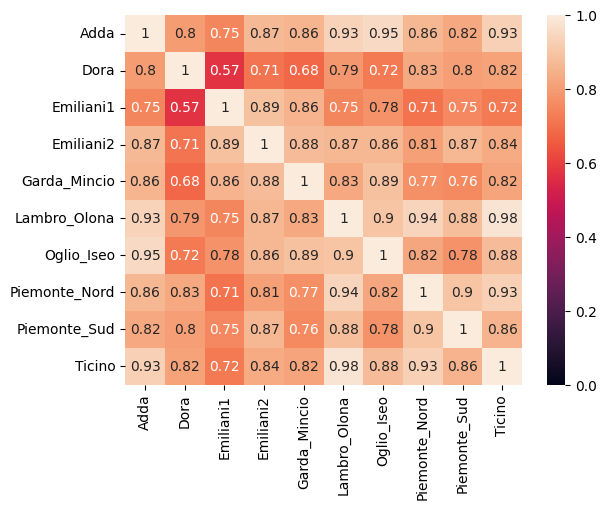

In [228]:
import seaborn as sb
from sklearn.cluster import KMeans
dataplot = sb.heatmap(targets_df_trainVal.corr(), annot=True,vmin=0)


In [463]:
clust = KMeans(n_clusters=3)
classes = clust.fit_predict(np.transpose(targets_df_trainVal))
classes

array([2, 0, 1, 1, 1, 2, 2, 0, 0, 2], dtype=int32)

In [464]:
for i in range(3):
    print(targets_df_trainVal.loc[:,classes==i].columns.values)

['Dora' 'Piemonte_Nord' 'Piemonte_Sud']
['Emiliani1' 'Emiliani2' 'Garda_Mincio']
['Adda' 'Lambro_Olona' 'Oglio_Iseo' 'Ticino']


In [451]:
clust = KMeans(n_clusters=4)
classes = clust.fit_predict(np.transpose(targets_df_trainVal))
classes

array([0, 3, 1, 1, 0, 2, 0, 2, 2, 2], dtype=int32)

In [452]:
for i in range(4):
    print(targets_df_trainVal.loc[:,classes==i].columns.values)

['Adda' 'Garda_Mincio' 'Oglio_Iseo']
['Emiliani1' 'Emiliani2']
['Lambro_Olona' 'Piemonte_Nord' 'Piemonte_Sud' 'Ticino']
['Dora']


## features loading

In [255]:
### wrapper best 5 features
path_features = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features/'

best5_wrapper_fulldf_train = pd.DataFrame()
best5_wrapper_fulldf_val = pd.DataFrame()
best5_wrapper_fulldf_test = pd.DataFrame()

for basin in basins:
    best5_wrapper_train_temp = pd.read_csv(path_features+basin+'_nonLinCFA_wrapper_best5_train.csv')
    best5_wrapper_val_temp = pd.read_csv(path_features+basin+'_nonLinCFA_wrapper_best5_val.csv')
    best5_wrapper_test_temp = pd.read_csv(path_features+basin+'_nonLinCFA_wrapper_best5_test.csv')
    best5_wrapper_fulldf_train[basin+'_'+best5_wrapper_train_temp.columns.values] = best5_wrapper_train_temp
    best5_wrapper_fulldf_val[basin+'_'+best5_wrapper_val_temp.columns.values] = best5_wrapper_val_temp
    best5_wrapper_fulldf_test[basin+'_'+best5_wrapper_test_temp.columns.values] = best5_wrapper_test_temp



In [254]:
### CMI features
path_features = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features/'

CMI_fulldf_train = pd.DataFrame()
CMI_fulldf_val = pd.DataFrame()
CMI_fulldf_test = pd.DataFrame()

for basin in basins:
    train_temp = pd.read_csv(path_features+basin+'_nonLinCFA_CMI_train.csv')
    val_temp = pd.read_csv(path_features+basin+'_nonLinCFA_CMI_val.csv')
    test_temp = pd.read_csv(path_features+basin+'_nonLinCFA_CMI_test.csv')
    CMI_fulldf_train[basin+'_'+train_temp.columns.values] = train_temp
    CMI_fulldf_val[basin+'_'+val_temp.columns.values] = val_temp
    CMI_fulldf_test[basin+'_'+test_temp.columns.values] = test_temp
    

In [253]:
### CMI best5 features
path_features = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features/'

best5_CMI_fulldf_train = pd.DataFrame()
best5_CMI_fulldf_val = pd.DataFrame()
best5_CMI_fulldf_test = pd.DataFrame()

for basin in basins:
    train_temp = pd.read_csv(path_features+basin+'_nonLinCFA_best5_CMI_train.csv')
    val_temp = pd.read_csv(path_features+basin+'_nonLinCFA_best5_CMI_val.csv')
    test_temp = pd.read_csv(path_features+basin+'_nonLinCFA_best5_CMI_test.csv')
    best5_CMI_fulldf_train[basin+'_'+train_temp.columns.values] = train_temp
    best5_CMI_fulldf_val[basin+'_'+val_temp.columns.values] = val_temp
    best5_CMI_fulldf_test[basin+'_'+test_temp.columns.values] = test_temp
    

## Full model - Wrapper best 5

In [500]:
best5_wrapper_fulldf_train_withClass = pd.DataFrame()
best5_wrapper_fulldf_val_withClass = pd.DataFrame()
best5_wrapper_fulldf_test_withClass = pd.DataFrame()

for i in range(10):
    best5_wrapper_fulldf_train_withClass = pd.concat((best5_wrapper_fulldf_train_withClass,pd.concat((best5_wrapper_fulldf_train,pd.DataFrame(1+i*np.ones(len(best5_wrapper_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    best5_wrapper_fulldf_val_withClass = pd.concat((best5_wrapper_fulldf_val_withClass,pd.concat((best5_wrapper_fulldf_val,pd.DataFrame(1+i*np.ones(len(best5_wrapper_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    best5_wrapper_fulldf_test_withClass = pd.concat((best5_wrapper_fulldf_test_withClass,pd.concat((best5_wrapper_fulldf_test,pd.DataFrame(1+i*np.ones(len(best5_wrapper_fulldf_test)),columns=['basin'])),axis=1)),axis=0)


In [271]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in basins:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)

In [278]:
### senza one-hot encoding
model_full = LinearRegression()
model_full.fit(pd.concat((best5_wrapper_fulldf_train_withClass,best5_wrapper_fulldf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))


LinearRegression()

In [286]:
for i in range(10):
    res = model_full.predict(best5_wrapper_fulldf_test_withClass.loc[best5_wrapper_fulldf_test_withClass.basin==i+1].values)
    print(r2_score(targets_df_test[basins[i]].values, res))

                        

-0.5491554759619361
-1.0423450950191295
-0.6594175746250646
-0.7279030457484599
-0.3240293352193375
-0.7789305558620834
-0.586276530759325
-0.625783137074384
-0.825757489868459
-0.6676428068629505


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearReg

In [301]:
### con OHE

In [502]:
for i in range(10):
    best5_wrapper_fulldf_train_withClass[basins[i]] = best5_wrapper_fulldf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    best5_wrapper_fulldf_val_withClass[basins[i]] = best5_wrapper_fulldf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    best5_wrapper_fulldf_test_withClass[basins[i]] = best5_wrapper_fulldf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)


In [503]:
best5_wrapper_fulldf_train_withClass

,Adda_cyclostationary_mean_tg_1w_3,Adda_cyclostationary_mean_tg_1w_6,Adda_cyclostationary_mean_tg_1w_5,Adda_cyclostationary_mean_rr_1w_0,Adda_cyclostationary_mean_tg_16w_2,Dora_cyclostationary_mean_tg_1w_0,Dora_cyclostationary_mean_rr_4w_1,Dora_cyclostationary_mean_tg_1w_2,Dora_cyclostationary_mean_tg_4w_1,Dora_cyclostationary_mean_tg_4w_0,...,Adda,Dora,Emiliani1,Emiliani2,Garda_Mincio,Lambro_Olona,Oglio_Iseo,Piemonte_Nord,Piemonte_Sud,Ticino
0,-0.862899,-1.709060,-1.866687,1.001341,-3.062159,-0.858428,0.569944,-0.645734,-0.958059,-1.179177,...,1,0,0,0,0,0,0,0,0,0
1,-0.093639,-0.490888,-1.024977,1.976018,-1.604230,-0.144075,2.777501,-0.040254,0.064877,-0.154668,...,1,0,0,0,0,0,0,0,0,0
2,-0.524505,-0.923993,-0.954945,1.350939,-2.492491,-0.543433,1.425829,-0.727940,-1.002116,-0.919496,...,1,0,0,0,0,0,0,0,0,0
3,-0.666293,-1.171925,-1.039569,0.464342,-1.901370,-0.723360,1.785519,-0.924722,-0.601101,-0.594848,...,1,0,0,0,0,0,0,0,0,0
4,-0.416695,-0.855241,-1.185594,0.406680,-2.302021,-0.540293,1.524603,-0.569035,-0.789653,-0.843317,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1.568770,1.778381,1.494928,-1.208471,1.138232,1.462830,-0.520256,1.585661,0.807565,0.577376,...,0,0,0,0,0,0,0,0,0,1
407,0.812306,1.051617,0.843470,0.824414,1.152253,0.599620,-0.530550,0.724000,1.020805,0.776516,...,0,0,0,0,0,0,0,0,0,1
408,0.876968,0.470849,0.404951,1.236207,1.253158,0.344849,0.031726,0.422436,0.910086,0.715672,...,0,0,0,0,0,0,0,0,0,1
409,-0.723696,-1.195756,-1.026883,-0.159932,0.874675,-1.130239,-0.154282,-1.116372,0.237759,0.083901,...,0,0,0,0,0,0,0,0,0,1


In [302]:
model_full_ohe = LinearRegression()
model_full_ohe.fit(pd.concat((best5_wrapper_fulldf_train_withClass,best5_wrapper_fulldf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))


LinearRegression()

In [303]:
for i in range(10):
    res = model_full_ohe.predict(best5_wrapper_fulldf_test_withClass.loc[best5_wrapper_fulldf_test_withClass.basin==i+1].values)
    print(r2_score(targets_df_test[basins[i]].values, res))

                        

-0.5415005337955616
-1.0338308669146623
-0.6131189863744742
-0.7083968352300551
-0.39181095113804565
-0.7874150404941778
-0.5603225748543441
-0.6433379917406741
-0.8360326699741558
-0.6155985316411592


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearReg

## Full model - CMI

In [376]:
fulldf_train_withClass = pd.DataFrame()
fulldf_val_withClass = pd.DataFrame()
fulldf_test_withClass = pd.DataFrame()

for i in range(10):
    fulldf_train_withClass = pd.concat((fulldf_train_withClass,pd.concat((CMI_fulldf_train,pd.DataFrame(1+i*np.ones(len(CMI_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    fulldf_val_withClass = pd.concat((fulldf_val_withClass,pd.concat((CMI_fulldf_val,pd.DataFrame(1+i*np.ones(len(CMI_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    fulldf_test_withClass = pd.concat((fulldf_test_withClass,pd.concat((CMI_fulldf_test,pd.DataFrame(1+i*np.ones(len(CMI_fulldf_test)),columns=['basin'])),axis=1)),axis=0)


In [377]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in basins:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)

In [378]:
### senza one-hot encoding
model_full = LinearRegression()
model_full.fit(pd.concat((fulldf_train_withClass,fulldf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))


LinearRegression()

In [379]:
for i in range(10):
    res = model_full.predict(fulldf_test_withClass.loc[fulldf_test_withClass.basin==i+1].values)
    print(r2_score(targets_df_test[basins[i]].values, res))

                        

-0.32432543674993175
-0.8338333508633748
-0.5346654436935785
-0.6156751999424308
-0.29797616991576814
-0.6914126013197579
-0.43343408191227617
-0.6440930744307678
-0.8875935087066893
-0.5576540694126282


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearReg

In [301]:
### con OHE

In [380]:
for i in range(10):
    fulldf_train_withClass[basins[i]] = fulldf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    fulldf_val_withClass[basins[i]] = fulldf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    fulldf_test_withClass[basins[i]] = fulldf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)


In [381]:
model_full_ohe = LinearRegression()
model_full_ohe.fit(pd.concat((fulldf_train_withClass,fulldf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))


LinearRegression()

In [382]:
for i in range(10):
    res = model_full_ohe.predict(fulldf_test_withClass.loc[fulldf_test_withClass.basin==i+1].values)
    print(r2_score(targets_df_test[basins[i]].values, res))

                        

-0.3343247368017468
-0.8408703888186033
-0.522049414451657
-0.6268155983314645
-0.3506464522126824
-0.6975832864306979
-0.4271381098033764
-0.683697356646664
-0.922163317963026
-0.5326480209316058


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearReg

## Full model - CMI best5

In [383]:
fulldf_train_withClass = pd.DataFrame()
fulldf_val_withClass = pd.DataFrame()
fulldf_test_withClass = pd.DataFrame()

for i in range(10):
    fulldf_train_withClass = pd.concat((fulldf_train_withClass,pd.concat((best5_CMI_fulldf_train,pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    fulldf_val_withClass = pd.concat((fulldf_val_withClass,pd.concat((best5_CMI_fulldf_val,pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    fulldf_test_withClass = pd.concat((fulldf_test_withClass,pd.concat((best5_CMI_fulldf_test,pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_test)),columns=['basin'])),axis=1)),axis=0)


In [384]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in basins:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)

In [385]:
### senza one-hot encoding
model_full = LinearRegression()
model_full.fit(pd.concat((fulldf_train_withClass,fulldf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))


LinearRegression()

In [386]:
for i in range(10):
    res = model_full.predict(fulldf_test_withClass.loc[fulldf_test_withClass.basin==i+1].values)
    print(r2_score(targets_df_test[basins[i]].values, res))

                        

0.07074209099490547
-0.3400251166748527
0.021472147689631682
-0.018948230897721796
0.1079367225647263
-0.10209848606072591
0.040766556111391794
-0.09174830928989253
-0.25051627456874725
-0.05702704585485252


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearReg

In [301]:
### con OHE

In [387]:
for i in range(10):
    fulldf_train_withClass[basins[i]] = fulldf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    fulldf_val_withClass[basins[i]] = fulldf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    fulldf_test_withClass[basins[i]] = fulldf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)


In [388]:
model_full_ohe = LinearRegression()
model_full_ohe.fit(pd.concat((fulldf_train_withClass,fulldf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))


LinearRegression()

In [389]:
for i in range(10):
    res = model_full_ohe.predict(fulldf_test_withClass.loc[fulldf_test_withClass.basin==i+1].values)
    print(r2_score(targets_df_test[basins[i]].values, res))

                        

0.07483055333995814
-0.33438354490326283
0.04241445328655613
-0.01150395664153292
0.10141628406867964
-0.10104147267469954
0.05616066638937134
-0.10050670963023434
-0.2571160595620916
-0.02778105022402344


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearReg

## Clusters

### Emiliani1 - Emiliani2 - Garda_Mincio: wrapper best 5

In [356]:
### prova con Emiliani1 e 2 e Garda_Mincio
clust_basins = ['Emiliani1','Emiliani2','Garda_Mincio']
colnames = [x for x in best5_wrapper_fulldf_train.columns if x.startswith('Emiliani1') or x.startswith('Emiliani2') or x.startswith('Garda_Mincio')]

best5_wrapper_clusterdf_train_withClass = pd.DataFrame()
best5_wrapper_clusterdf_val_withClass = pd.DataFrame()
best5_wrapper_clusterdf_test_withClass = pd.DataFrame()

for i in range(3):
    best5_wrapper_clusterdf_train_withClass = pd.concat((best5_wrapper_clusterdf_train_withClass,pd.concat((best5_wrapper_fulldf_train[colnames],pd.DataFrame(1+i*np.ones(len(best5_wrapper_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    best5_wrapper_clusterdf_val_withClass = pd.concat((best5_wrapper_clusterdf_val_withClass,pd.concat((best5_wrapper_fulldf_val[colnames],pd.DataFrame(1+i*np.ones(len(best5_wrapper_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    best5_wrapper_clusterdf_test_withClass = pd.concat((best5_wrapper_clusterdf_test_withClass,pd.concat((best5_wrapper_fulldf_test[colnames],pd.DataFrame(1+i*np.ones(len(best5_wrapper_fulldf_test)),columns=['basin'])),axis=1)),axis=0)

for i in range(3):
    best5_wrapper_clusterdf_train_withClass[clust_basins[i]] = best5_wrapper_clusterdf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    best5_wrapper_clusterdf_val_withClass[clust_basins[i]] = best5_wrapper_clusterdf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    best5_wrapper_clusterdf_test_withClass[clust_basins[i]] = best5_wrapper_clusterdf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)

best5_wrapper_clusterdf_train_withClass = best5_wrapper_clusterdf_train_withClass.loc[:,best5_wrapper_clusterdf_train_withClass.columns != 'basin']
best5_wrapper_clusterdf_val_withClass = best5_wrapper_clusterdf_val_withClass.loc[:,best5_wrapper_clusterdf_val_withClass.columns != 'basin']
best5_wrapper_clusterdf_test_withClass = best5_wrapper_clusterdf_test_withClass.loc[:,best5_wrapper_clusterdf_test_withClass.columns != 'basin']


In [357]:
best5_wrapper_clusterdf_train_withClass

,Emiliani1_cyclostationary_mean_rr_8w_0,Emiliani1_cyclostationary_mean_tg_0,Emiliani1_cyclostationary_mean_rr_16w_1,Emiliani1_cyclostationary_mean_rr_12w_2,Emiliani1_cyclostationary_mean_rr_1w_4,Emiliani2_cyclostationary_mean_tg_1w_5,Emiliani2_cyclostationary_mean_rr_8w_3,Emiliani2_cyclostationary_mean_tg_8w_1,Emiliani2_cyclostationary_mean_rr_16w_2,Emiliani2_cyclostationary_mean_tg_1w_6,Garda_Mincio_cyclostationary_mean_rr_4w_1,Garda_Mincio_cyclostationary_mean_tg_0,Garda_Mincio_cyclostationary_mean_rr_24w_1,Garda_Mincio_cyclostationary_mean_rr_24w_4,Garda_Mincio_cyclostationary_mean_rr_24w_6,Emiliani1,Emiliani2,Garda_Mincio
0,2.563762,0.702658,2.356915,4.551719,0.733057,-0.890461,1.715033,0.451434,5.057234,0.839851,1.758769,0.309939,1.937637,2.719823,2.154612,1,0,0
1,1.725573,1.770284,2.298396,1.893610,0.688605,-0.266454,0.884643,1.266314,3.825332,1.871824,1.121893,1.158323,1.850264,4.725401,4.547085,1,0,0
2,1.426653,-0.294432,1.655602,1.912331,0.400704,-0.541753,0.397911,0.262699,2.978955,2.175787,0.598275,-0.747849,1.614353,2.989650,3.013864,1,0,0
3,1.048203,1.312823,0.788894,1.822362,0.740061,-0.679603,0.054424,0.396038,2.665933,2.151856,0.310672,0.618235,1.102825,2.877711,2.874078,1,0,0
4,1.795649,0.083310,4.072560,2.039331,1.203853,-0.500179,0.103811,0.302639,2.141665,2.644978,0.314132,-0.197356,1.639373,1.887482,2.011651,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.549183,1.068315,-0.544373,-0.687935,-1.495602,0.805732,-0.293248,0.661497,-0.655689,1.600522,0.030398,1.386827,-1.000215,-0.832783,-0.872908,0,0,1
407,-0.481985,0.560944,-0.518064,-0.626884,-0.968744,0.306776,-0.156714,0.689496,-0.459704,1.017618,0.377049,0.600403,-0.657988,-0.534876,-0.467096,0,0,1
408,-0.402054,0.350446,-0.616373,-0.606093,-0.646526,0.503166,0.174464,0.605186,-0.408143,0.542851,0.643723,0.382350,-0.459207,-0.351997,-0.249248,0,0,1
409,-0.146823,-1.792820,-0.325116,-0.462663,-0.400672,-1.067879,0.229314,0.030515,-0.452395,-0.750222,-0.102080,-1.910985,-0.487928,-0.312771,-0.184850,0,0,1


In [358]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in ['Emiliani1','Emiliani2','Garda_Mincio']:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)


In [359]:
targets_df_train_unfolded

,0
0,-0.382765
1,0.319215
2,0.548542
3,-0.010351
4,0.402030
...,...
1228,0.032299
1229,0.132804
1230,-0.214182
1231,-2.409204


In [360]:
model_E1E2GM_ohe = LinearRegression()
model_E1E2GM_ohe.fit(pd.concat((best5_wrapper_clusterdf_train_withClass,best5_wrapper_clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_E1E2GM_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Emiliani1==1].values)
print(r2_score(targets_df_test['Emiliani1'].values, res))
res = model_E1E2GM_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Emiliani2==1].values)
print(r2_score(targets_df_test['Emiliani2'].values, res))
res = model_E1E2GM_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Garda_Mincio==1].values)
print(r2_score(targets_df_test['Garda_Mincio'].values, res))


0.31486223593225293
0.2084530199165946
0.24633777765773346


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [361]:
for i in range(best5_wrapper_clusterdf_train_withClass.shape[1]-len(clust_basins)):
    for j in clust_basins:
        best5_wrapper_clusterdf_train_withClass[best5_wrapper_clusterdf_train_withClass.columns[i]+'_'+j] = best5_wrapper_clusterdf_train_withClass.apply(lambda x:x[i]*x[j], axis=1)
        best5_wrapper_clusterdf_val_withClass[best5_wrapper_clusterdf_val_withClass.columns[i]+'_'+j] = best5_wrapper_clusterdf_val_withClass.apply(lambda x:x[i]*x[j], axis=1)
        best5_wrapper_clusterdf_test_withClass[best5_wrapper_clusterdf_test_withClass.columns[i]+'_'+j] = best5_wrapper_clusterdf_test_withClass.apply(lambda x:x[i]*x[j], axis=1)

best5_wrapper_clusterdf_train_withClass

,Emiliani1_cyclostationary_mean_rr_8w_0,Emiliani1_cyclostationary_mean_tg_0,Emiliani1_cyclostationary_mean_rr_16w_1,Emiliani1_cyclostationary_mean_rr_12w_2,Emiliani1_cyclostationary_mean_rr_1w_4,Emiliani2_cyclostationary_mean_tg_1w_5,Emiliani2_cyclostationary_mean_rr_8w_3,Emiliani2_cyclostationary_mean_tg_8w_1,Emiliani2_cyclostationary_mean_rr_16w_2,Emiliani2_cyclostationary_mean_tg_1w_6,...,Garda_Mincio_cyclostationary_mean_tg_0_Garda_Mincio,Garda_Mincio_cyclostationary_mean_rr_24w_1_Emiliani1,Garda_Mincio_cyclostationary_mean_rr_24w_1_Emiliani2,Garda_Mincio_cyclostationary_mean_rr_24w_1_Garda_Mincio,Garda_Mincio_cyclostationary_mean_rr_24w_4_Emiliani1,Garda_Mincio_cyclostationary_mean_rr_24w_4_Emiliani2,Garda_Mincio_cyclostationary_mean_rr_24w_4_Garda_Mincio,Garda_Mincio_cyclostationary_mean_rr_24w_6_Emiliani1,Garda_Mincio_cyclostationary_mean_rr_24w_6_Emiliani2,Garda_Mincio_cyclostationary_mean_rr_24w_6_Garda_Mincio
0,2.563762,0.702658,2.356915,4.551719,0.733057,-0.890461,1.715033,0.451434,5.057234,0.839851,...,0.000000,1.937637,0.0,0.000000,2.719823,0.0,0.000000,2.154612,0.0,0.000000
1,1.725573,1.770284,2.298396,1.893610,0.688605,-0.266454,0.884643,1.266314,3.825332,1.871824,...,0.000000,1.850264,0.0,0.000000,4.725401,0.0,0.000000,4.547085,0.0,0.000000
2,1.426653,-0.294432,1.655602,1.912331,0.400704,-0.541753,0.397911,0.262699,2.978955,2.175787,...,-0.000000,1.614353,0.0,0.000000,2.989650,0.0,0.000000,3.013864,0.0,0.000000
3,1.048203,1.312823,0.788894,1.822362,0.740061,-0.679603,0.054424,0.396038,2.665933,2.151856,...,0.000000,1.102825,0.0,0.000000,2.877711,0.0,0.000000,2.874078,0.0,0.000000
4,1.795649,0.083310,4.072560,2.039331,1.203853,-0.500179,0.103811,0.302639,2.141665,2.644978,...,-0.000000,1.639373,0.0,0.000000,1.887482,0.0,0.000000,2.011651,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.549183,1.068315,-0.544373,-0.687935,-1.495602,0.805732,-0.293248,0.661497,-0.655689,1.600522,...,1.386827,-0.000000,-0.0,-1.000215,-0.000000,-0.0,-0.832783,-0.000000,-0.0,-0.872908
407,-0.481985,0.560944,-0.518064,-0.626884,-0.968744,0.306776,-0.156714,0.689496,-0.459704,1.017618,...,0.600403,-0.000000,-0.0,-0.657988,-0.000000,-0.0,-0.534876,-0.000000,-0.0,-0.467096
408,-0.402054,0.350446,-0.616373,-0.606093,-0.646526,0.503166,0.174464,0.605186,-0.408143,0.542851,...,0.382350,-0.000000,-0.0,-0.459207,-0.000000,-0.0,-0.351997,-0.000000,-0.0,-0.249248
409,-0.146823,-1.792820,-0.325116,-0.462663,-0.400672,-1.067879,0.229314,0.030515,-0.452395,-0.750222,...,-1.910985,-0.000000,-0.0,-0.487928,-0.000000,-0.0,-0.312771,-0.000000,-0.0,-0.184850


In [362]:
model_E1E2GM_ohe = LinearRegression()
model_E1E2GM_ohe.fit(pd.concat((best5_wrapper_clusterdf_train_withClass,best5_wrapper_clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_E1E2GM_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Emiliani1==1].values)
print(r2_score(targets_df_test['Emiliani1'].values, res))
res = model_E1E2GM_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Emiliani2==1].values)
print(r2_score(targets_df_test['Emiliani2'].values, res))
res = model_E1E2GM_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Garda_Mincio==1].values)
print(r2_score(targets_df_test['Garda_Mincio'].values, res))


0.2983574252239063
0.2060983834314577
0.23368544966756366


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Emiliani1 - Emiliani2 - Garda_Mincio: CMI

In [390]:
### prova con Emiliani1 e 2 e Garda_Mincio
clust_basins = ['Emiliani1','Emiliani2','Garda_Mincio']
colnames = [x for x in CMI_fulldf_train.columns if x.startswith('Emiliani1') or x.startswith('Emiliani2') or x.startswith('Garda_Mincio')]

clusterdf_train_withClass = pd.DataFrame()
clusterdf_val_withClass = pd.DataFrame()
clusterdf_test_withClass = pd.DataFrame()

for i in range(3):
    clusterdf_train_withClass = pd.concat((clusterdf_train_withClass,pd.concat((CMI_fulldf_train[colnames],pd.DataFrame(1+i*np.ones(len(CMI_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_val_withClass = pd.concat((clusterdf_val_withClass,pd.concat((CMI_fulldf_val[colnames],pd.DataFrame(1+i*np.ones(len(CMI_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_test_withClass = pd.concat((clusterdf_test_withClass,pd.concat((CMI_fulldf_test[colnames],pd.DataFrame(1+i*np.ones(len(CMI_fulldf_test)),columns=['basin'])),axis=1)),axis=0)

for i in range(3):
    clusterdf_train_withClass[clust_basins[i]] = clusterdf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_val_withClass[clust_basins[i]] = clusterdf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_test_withClass[clust_basins[i]] = clusterdf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)

clusterdf_train_withClass = clusterdf_train_withClass.loc[:,clusterdf_train_withClass.columns != 'basin']
clusterdf_val_withClass = clusterdf_val_withClass.loc[:,clusterdf_val_withClass.columns != 'basin']
clusterdf_test_withClass = clusterdf_test_withClass.loc[:,clusterdf_test_withClass.columns != 'basin']


In [391]:
clusterdf_train_withClass

,Emiliani1_cyclostationary_mean_rr_4w_0,Emiliani1_cyclostationary_mean_tg_1w_4,Emiliani1_cyclostationary_mean_rr_12w_1,Emiliani1_cyclostationary_mean_rr_8w_1,Emiliani1_cyclostationary_mean_tg_9,Emiliani1_cyclostationary_mean_rr_8w_0,Emiliani2_cyclostationary_mean_tg_1w_4,Emiliani2_cyclostationary_mean_rr_4w_3,Emiliani2_cyclostationary_mean_tg_4,Emiliani2_cyclostationary_mean_rr_8w_0,...,Emiliani2_cyclostationary_mean_rr_12w_0,Garda_Mincio_cyclostationary_mean_rr_4w_0,Garda_Mincio_cyclostationary_mean_tg_0,Garda_Mincio_cyclostationary_mean_rr_8w_0,Garda_Mincio_cyclostationary_mean_rr_12w_2,Garda_Mincio_cyclostationary_mean_tg_8w_0,Garda_Mincio_cyclostationary_mean_rr_4w_1,Emiliani1,Emiliani2,Garda_Mincio
0,2.112078,0.345989,1.690770,3.965287,0.268224,2.563762,-0.415835,0.733822,-0.736407,2.581050,...,2.601327,1.154090,0.309939,1.365733,1.718220,0.523659,1.758769,1,0,0
1,1.404523,1.128851,1.865833,1.655892,0.977612,1.725573,0.237307,0.849889,0.294888,2.460299,...,2.248295,1.494420,1.158323,1.161450,3.292752,1.350980,1.121893,1,0,0
2,1.162736,0.786460,1.429151,1.672157,-0.780151,1.426653,-0.259989,0.518355,-1.191392,1.657472,...,1.476876,0.992024,-0.747849,0.765542,2.143920,0.395851,0.598275,1,0,0
3,0.861999,0.564161,0.611897,1.593990,0.408553,1.048203,-0.565851,0.239497,0.067063,1.600489,...,1.354389,0.831685,0.618235,0.486500,2.057757,0.584992,0.310672,1,0,0
4,1.461930,0.604584,4.150391,1.782496,-0.260577,1.795649,-0.187005,0.696217,-0.894857,1.249495,...,1.149851,0.648410,-0.197356,0.471393,1.411145,0.375705,0.314132,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.211596,0.739113,-0.281990,-0.636426,1.599630,-0.549183,1.352614,-0.220555,0.471800,-0.187672,...,-0.500492,-0.325559,1.386827,-0.243007,-0.779607,0.784844,0.030398,0,0,1
407,-0.765747,0.855313,-0.234571,-1.204469,0.920235,-0.481985,1.040390,0.346445,0.034058,-0.358316,...,-0.168721,-0.048154,0.600403,-0.089677,-0.282528,0.689576,0.377049,0,0,1
408,-0.609296,0.697286,-0.562017,-1.089158,0.341994,-0.402054,0.830698,0.429694,0.796373,-0.106524,...,-0.094182,0.392946,0.382350,0.196236,-0.211020,0.473678,0.643723,0,0,1
409,-0.836849,-0.719738,-0.028118,-0.925439,-1.523290,-0.146823,-0.631908,-0.434877,-2.562406,-0.028237,...,0.027915,-0.140998,-1.910985,0.283754,-0.190893,-0.254712,-0.102080,0,0,1


In [392]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in ['Emiliani1','Emiliani2','Garda_Mincio']:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)


In [393]:
targets_df_train_unfolded

,0
0,-0.382765
1,0.319215
2,0.548542
3,-0.010351
4,0.402030
...,...
1228,0.032299
1229,0.132804
1230,-0.214182
1231,-2.409204


In [394]:
model_E1E2GM_ohe = LinearRegression()
model_E1E2GM_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_E1E2GM_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Emiliani1==1].values)
print(r2_score(targets_df_test['Emiliani1'].values, res))
res = model_E1E2GM_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Emiliani2==1].values)
print(r2_score(targets_df_test['Emiliani2'].values, res))
res = model_E1E2GM_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Garda_Mincio==1].values)
print(r2_score(targets_df_test['Garda_Mincio'].values, res))


0.24672638409672598
0.13606766610694088
0.22388038233882868


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [395]:
for i in range(clusterdf_train_withClass.shape[1]-len(clust_basins)):
    for j in clust_basins:
        clusterdf_train_withClass[clusterdf_train_withClass.columns[i]+'_'+j] = clusterdf_train_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_val_withClass[clusterdf_val_withClass.columns[i]+'_'+j] = clusterdf_val_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_test_withClass[clusterdf_test_withClass.columns[i]+'_'+j] = clusterdf_test_withClass.apply(lambda x:x[i]*x[j], axis=1)

clusterdf_train_withClass

,Emiliani1_cyclostationary_mean_rr_4w_0,Emiliani1_cyclostationary_mean_tg_1w_4,Emiliani1_cyclostationary_mean_rr_12w_1,Emiliani1_cyclostationary_mean_rr_8w_1,Emiliani1_cyclostationary_mean_tg_9,Emiliani1_cyclostationary_mean_rr_8w_0,Emiliani2_cyclostationary_mean_tg_1w_4,Emiliani2_cyclostationary_mean_rr_4w_3,Emiliani2_cyclostationary_mean_tg_4,Emiliani2_cyclostationary_mean_rr_8w_0,...,Garda_Mincio_cyclostationary_mean_rr_8w_0_Garda_Mincio,Garda_Mincio_cyclostationary_mean_rr_12w_2_Emiliani1,Garda_Mincio_cyclostationary_mean_rr_12w_2_Emiliani2,Garda_Mincio_cyclostationary_mean_rr_12w_2_Garda_Mincio,Garda_Mincio_cyclostationary_mean_tg_8w_0_Emiliani1,Garda_Mincio_cyclostationary_mean_tg_8w_0_Emiliani2,Garda_Mincio_cyclostationary_mean_tg_8w_0_Garda_Mincio,Garda_Mincio_cyclostationary_mean_rr_4w_1_Emiliani1,Garda_Mincio_cyclostationary_mean_rr_4w_1_Emiliani2,Garda_Mincio_cyclostationary_mean_rr_4w_1_Garda_Mincio
0,2.112078,0.345989,1.690770,3.965287,0.268224,2.563762,-0.415835,0.733822,-0.736407,2.581050,...,0.000000,1.718220,0.0,0.000000,0.523659,0.0,0.000000,1.758769,0.0,0.000000
1,1.404523,1.128851,1.865833,1.655892,0.977612,1.725573,0.237307,0.849889,0.294888,2.460299,...,0.000000,3.292752,0.0,0.000000,1.350980,0.0,0.000000,1.121893,0.0,0.000000
2,1.162736,0.786460,1.429151,1.672157,-0.780151,1.426653,-0.259989,0.518355,-1.191392,1.657472,...,0.000000,2.143920,0.0,0.000000,0.395851,0.0,0.000000,0.598275,0.0,0.000000
3,0.861999,0.564161,0.611897,1.593990,0.408553,1.048203,-0.565851,0.239497,0.067063,1.600489,...,0.000000,2.057757,0.0,0.000000,0.584992,0.0,0.000000,0.310672,0.0,0.000000
4,1.461930,0.604584,4.150391,1.782496,-0.260577,1.795649,-0.187005,0.696217,-0.894857,1.249495,...,0.000000,1.411145,0.0,0.000000,0.375705,0.0,0.000000,0.314132,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.211596,0.739113,-0.281990,-0.636426,1.599630,-0.549183,1.352614,-0.220555,0.471800,-0.187672,...,-0.243007,-0.000000,-0.0,-0.779607,0.000000,0.0,0.784844,0.000000,0.0,0.030398
407,-0.765747,0.855313,-0.234571,-1.204469,0.920235,-0.481985,1.040390,0.346445,0.034058,-0.358316,...,-0.089677,-0.000000,-0.0,-0.282528,0.000000,0.0,0.689576,0.000000,0.0,0.377049
408,-0.609296,0.697286,-0.562017,-1.089158,0.341994,-0.402054,0.830698,0.429694,0.796373,-0.106524,...,0.196236,-0.000000,-0.0,-0.211020,0.000000,0.0,0.473678,0.000000,0.0,0.643723
409,-0.836849,-0.719738,-0.028118,-0.925439,-1.523290,-0.146823,-0.631908,-0.434877,-2.562406,-0.028237,...,0.283754,-0.000000,-0.0,-0.190893,-0.000000,-0.0,-0.254712,-0.000000,-0.0,-0.102080


In [396]:
model_E1E2GM_ohe = LinearRegression()
model_E1E2GM_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_E1E2GM_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Emiliani1==1].values)
print(r2_score(targets_df_test['Emiliani1'].values, res))
res = model_E1E2GM_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Emiliani2==1].values)
print(r2_score(targets_df_test['Emiliani2'].values, res))
res = model_E1E2GM_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Garda_Mincio==1].values)
print(r2_score(targets_df_test['Garda_Mincio'].values, res))


0.27369143203190605
0.1317049349915349
0.2036432280102406


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Emiliani1 - Emiliani2 - Garda_Mincio: CMI best 5

In [549]:
### prova con Emiliani1 e 2 e Garda_Mincio
clust_basins = ['Emiliani1','Emiliani2','Garda_Mincio']
colnames = [x for x in best5_CMI_fulldf_train.columns if x.startswith('Emiliani1') or x.startswith('Emiliani2') or x.startswith('Garda_Mincio')]

clusterdf_train_withClass = pd.DataFrame()
clusterdf_val_withClass = pd.DataFrame()
clusterdf_test_withClass = pd.DataFrame()

for i in range(3):
    clusterdf_train_withClass = pd.concat((clusterdf_train_withClass,pd.concat((best5_CMI_fulldf_train[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_val_withClass = pd.concat((clusterdf_val_withClass,pd.concat((best5_CMI_fulldf_val[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_test_withClass = pd.concat((clusterdf_test_withClass,pd.concat((best5_CMI_fulldf_test[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_test)),columns=['basin'])),axis=1)),axis=0)

for i in range(3):
    clusterdf_train_withClass[clust_basins[i]] = clusterdf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_val_withClass[clust_basins[i]] = clusterdf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_test_withClass[clust_basins[i]] = clusterdf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)

clusterdf_train_withClass = clusterdf_train_withClass.loc[:,clusterdf_train_withClass.columns != 'basin']
clusterdf_val_withClass = clusterdf_val_withClass.loc[:,clusterdf_val_withClass.columns != 'basin']
clusterdf_test_withClass = clusterdf_test_withClass.loc[:,clusterdf_test_withClass.columns != 'basin']


In [550]:
clusterdf_train_withClass

,Emiliani1_cyclostationary_mean_rr_4w_0,Emiliani1_cyclostationary_mean_tg_1w_4,Emiliani1_cyclostationary_mean_rr_12w_1,Emiliani1_cyclostationary_mean_rr_8w_1,Emiliani1_cyclostationary_mean_tg_9,Emiliani2_cyclostationary_mean_tg_1w_4,Emiliani2_cyclostationary_mean_rr_4w_3,Emiliani2_cyclostationary_mean_tg_4,Emiliani2_cyclostationary_mean_rr_8w_0,Emiliani2_cyclostationary_mean_rr_12w_1,Garda_Mincio_cyclostationary_mean_rr_4w_0,Garda_Mincio_cyclostationary_mean_tg_0,Garda_Mincio_cyclostationary_mean_rr_8w_0,Garda_Mincio_cyclostationary_mean_rr_12w_2,Garda_Mincio_cyclostationary_mean_tg_8w_0,Emiliani1,Emiliani2,Garda_Mincio
0,2.112078,0.345989,1.690770,3.965287,0.268224,-0.415835,0.733822,-0.736407,2.581050,1.579481,1.154090,0.309939,1.365733,1.718220,0.523659,1,0,0
1,1.404523,1.128851,1.865833,1.655892,0.977612,0.237307,0.849889,0.294888,2.460299,1.146518,1.494420,1.158323,1.161450,3.292752,1.350980,1,0,0
2,1.162736,0.786460,1.429151,1.672157,-0.780151,-0.259989,0.518355,-1.191392,1.657472,0.697926,0.992024,-0.747849,0.765542,2.143920,0.395851,1,0,0
3,0.861999,0.564161,0.611897,1.593990,0.408553,-0.565851,0.239497,0.067063,1.600489,0.578318,0.831685,0.618235,0.486500,2.057757,0.584992,1,0,0
4,1.461930,0.604584,4.150391,1.782496,-0.260577,-0.187005,0.696217,-0.894857,1.249495,0.843396,0.648410,-0.197356,0.471393,1.411145,0.375705,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.211596,0.739113,-0.281990,-0.636426,1.599630,1.352614,-0.220555,0.471800,-0.187672,-0.422427,-0.325559,1.386827,-0.243007,-0.779607,0.784844,0,0,1
407,-0.765747,0.855313,-0.234571,-1.204469,0.920235,1.040390,0.346445,0.034058,-0.358316,-0.518833,-0.048154,0.600403,-0.089677,-0.282528,0.689576,0,0,1
408,-0.609296,0.697286,-0.562017,-1.089158,0.341994,0.830698,0.429694,0.796373,-0.106524,-0.588942,0.392946,0.382350,0.196236,-0.211020,0.473678,0,0,1
409,-0.836849,-0.719738,-0.028118,-0.925439,-1.523290,-0.631908,-0.434877,-2.562406,-0.028237,-0.468533,-0.140998,-1.910985,0.283754,-0.190893,-0.254712,0,0,1


In [551]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in ['Emiliani1','Emiliani2','Garda_Mincio']:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)


In [552]:
targets_df_train_unfolded

,0
0,-0.382765
1,0.319215
2,0.548542
3,-0.010351
4,0.402030
...,...
1228,0.032299
1229,0.132804
1230,-0.214182
1231,-2.409204


In [553]:
model_E1E2GM_ohe = LinearRegression()
model_E1E2GM_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_E1E2GM_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Emiliani1==1].values)
print(r2_score(targets_df_test['Emiliani1'].values, res))
res = model_E1E2GM_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Emiliani2==1].values)
print(r2_score(targets_df_test['Emiliani2'].values, res))
res = model_E1E2GM_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Garda_Mincio==1].values)
print(r2_score(targets_df_test['Garda_Mincio'].values, res))


0.4031090822249198
0.3100764945337038
0.28477623168379684


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [554]:
print(model_E1E2GM_ohe.coef_,model_E1E2GM_ohe.intercept_)

[[ 0.15359654 -0.08367787  0.18876555 -0.08755932 -0.12342461 -0.00735284
   0.12504554 -0.11491597 -0.04351746 -0.02367721 -0.03127354 -0.03282753
   0.24373819 -0.07772121  0.11412778 -0.05248622 -0.02688542  0.07937163]] [0.0245803]


In [402]:
for i in range(clusterdf_train_withClass.shape[1]-len(clust_basins)):
    for j in clust_basins:
        clusterdf_train_withClass[clusterdf_train_withClass.columns[i]+'_'+j] = clusterdf_train_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_val_withClass[clusterdf_val_withClass.columns[i]+'_'+j] = clusterdf_val_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_test_withClass[clusterdf_test_withClass.columns[i]+'_'+j] = clusterdf_test_withClass.apply(lambda x:x[i]*x[j], axis=1)

clusterdf_train_withClass

,Emiliani1_cyclostationary_mean_rr_4w_0,Emiliani1_cyclostationary_mean_tg_1w_4,Emiliani1_cyclostationary_mean_rr_12w_1,Emiliani1_cyclostationary_mean_rr_8w_1,Emiliani1_cyclostationary_mean_tg_9,Emiliani2_cyclostationary_mean_tg_1w_4,Emiliani2_cyclostationary_mean_rr_4w_3,Emiliani2_cyclostationary_mean_tg_4,Emiliani2_cyclostationary_mean_rr_8w_0,Emiliani2_cyclostationary_mean_rr_12w_1,...,Garda_Mincio_cyclostationary_mean_tg_0_Garda_Mincio,Garda_Mincio_cyclostationary_mean_rr_8w_0_Emiliani1,Garda_Mincio_cyclostationary_mean_rr_8w_0_Emiliani2,Garda_Mincio_cyclostationary_mean_rr_8w_0_Garda_Mincio,Garda_Mincio_cyclostationary_mean_rr_12w_2_Emiliani1,Garda_Mincio_cyclostationary_mean_rr_12w_2_Emiliani2,Garda_Mincio_cyclostationary_mean_rr_12w_2_Garda_Mincio,Garda_Mincio_cyclostationary_mean_tg_8w_0_Emiliani1,Garda_Mincio_cyclostationary_mean_tg_8w_0_Emiliani2,Garda_Mincio_cyclostationary_mean_tg_8w_0_Garda_Mincio
0,2.112078,0.345989,1.690770,3.965287,0.268224,-0.415835,0.733822,-0.736407,2.581050,1.579481,...,0.000000,1.365733,0.0,0.000000,1.718220,0.0,0.000000,0.523659,0.0,0.000000
1,1.404523,1.128851,1.865833,1.655892,0.977612,0.237307,0.849889,0.294888,2.460299,1.146518,...,0.000000,1.161450,0.0,0.000000,3.292752,0.0,0.000000,1.350980,0.0,0.000000
2,1.162736,0.786460,1.429151,1.672157,-0.780151,-0.259989,0.518355,-1.191392,1.657472,0.697926,...,-0.000000,0.765542,0.0,0.000000,2.143920,0.0,0.000000,0.395851,0.0,0.000000
3,0.861999,0.564161,0.611897,1.593990,0.408553,-0.565851,0.239497,0.067063,1.600489,0.578318,...,0.000000,0.486500,0.0,0.000000,2.057757,0.0,0.000000,0.584992,0.0,0.000000
4,1.461930,0.604584,4.150391,1.782496,-0.260577,-0.187005,0.696217,-0.894857,1.249495,0.843396,...,-0.000000,0.471393,0.0,0.000000,1.411145,0.0,0.000000,0.375705,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.211596,0.739113,-0.281990,-0.636426,1.599630,1.352614,-0.220555,0.471800,-0.187672,-0.422427,...,1.386827,-0.000000,-0.0,-0.243007,-0.000000,-0.0,-0.779607,0.000000,0.0,0.784844
407,-0.765747,0.855313,-0.234571,-1.204469,0.920235,1.040390,0.346445,0.034058,-0.358316,-0.518833,...,0.600403,-0.000000,-0.0,-0.089677,-0.000000,-0.0,-0.282528,0.000000,0.0,0.689576
408,-0.609296,0.697286,-0.562017,-1.089158,0.341994,0.830698,0.429694,0.796373,-0.106524,-0.588942,...,0.382350,0.000000,0.0,0.196236,-0.000000,-0.0,-0.211020,0.000000,0.0,0.473678
409,-0.836849,-0.719738,-0.028118,-0.925439,-1.523290,-0.631908,-0.434877,-2.562406,-0.028237,-0.468533,...,-1.910985,0.000000,0.0,0.283754,-0.000000,-0.0,-0.190893,-0.000000,-0.0,-0.254712


In [403]:
model_E1E2GM_ohe = LinearRegression()
model_E1E2GM_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_E1E2GM_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Emiliani1==1].values)
print(r2_score(targets_df_test['Emiliani1'].values, res))
res = model_E1E2GM_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Emiliani2==1].values)
print(r2_score(targets_df_test['Emiliani2'].values, res))
res = model_E1E2GM_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Garda_Mincio==1].values)
print(r2_score(targets_df_test['Garda_Mincio'].values, res))


0.4159901109016101
0.31316188469641604
0.24666673132732686


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Adda - Lambro_Olona - Oglio_Iseo - Ticino: wrapper best 5

In [363]:
clust_basins = ['Adda', 'Lambro_Olona', 'Oglio_Iseo', 'Ticino']
colnames = [x for x in best5_wrapper_fulldf_train.columns if x.startswith('Adda') or x.startswith('Lambro_Olona') or x.startswith('Oglio_Iseo') or x.startswith('Ticino')]

best5_wrapper_clusterdf_train_withClass = pd.DataFrame()
best5_wrapper_clusterdf_val_withClass = pd.DataFrame()
best5_wrapper_clusterdf_test_withClass = pd.DataFrame()

for i in range(len(clust_basins)):
    best5_wrapper_clusterdf_train_withClass = pd.concat((best5_wrapper_clusterdf_train_withClass,pd.concat((best5_wrapper_fulldf_train[colnames],pd.DataFrame(1+i*np.ones(len(best5_wrapper_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    best5_wrapper_clusterdf_val_withClass = pd.concat((best5_wrapper_clusterdf_val_withClass,pd.concat((best5_wrapper_fulldf_val[colnames],pd.DataFrame(1+i*np.ones(len(best5_wrapper_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    best5_wrapper_clusterdf_test_withClass = pd.concat((best5_wrapper_clusterdf_test_withClass,pd.concat((best5_wrapper_fulldf_test[colnames],pd.DataFrame(1+i*np.ones(len(best5_wrapper_fulldf_test)),columns=['basin'])),axis=1)),axis=0)

for i in range(len(clust_basins)):
    best5_wrapper_clusterdf_train_withClass[clust_basins[i]] = best5_wrapper_clusterdf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    best5_wrapper_clusterdf_val_withClass[clust_basins[i]] = best5_wrapper_clusterdf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    best5_wrapper_clusterdf_test_withClass[clust_basins[i]] = best5_wrapper_clusterdf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)

best5_wrapper_clusterdf_train_withClass = best5_wrapper_clusterdf_train_withClass.loc[:,best5_wrapper_clusterdf_train_withClass.columns != 'basin']
best5_wrapper_clusterdf_val_withClass = best5_wrapper_clusterdf_val_withClass.loc[:,best5_wrapper_clusterdf_val_withClass.columns != 'basin']
best5_wrapper_clusterdf_test_withClass = best5_wrapper_clusterdf_test_withClass.loc[:,best5_wrapper_clusterdf_test_withClass.columns != 'basin']


In [364]:
best5_wrapper_clusterdf_train_withClass

,Adda_cyclostationary_mean_tg_1w_3,Adda_cyclostationary_mean_tg_1w_6,Adda_cyclostationary_mean_tg_1w_5,Adda_cyclostationary_mean_rr_1w_0,Adda_cyclostationary_mean_tg_16w_2,Lambro_Olona_cyclostationary_mean_tg_1w_2,Lambro_Olona_cyclostationary_mean_rr_1w_1,Lambro_Olona_cyclostationary_mean_tg_1w_5,Lambro_Olona_cyclostationary_mean_tg_1w_4,Lambro_Olona_cyclostationary_mean_tg_24w_1,...,Oglio_Iseo_cyclostationary_mean_tg_1w_2,Ticino_cyclostationary_mean_tg_1w_3,Ticino_cyclostationary_mean_rr_1w_1,Ticino_cyclostationary_mean_tg_16w_3,Ticino_cyclostationary_mean_rr_24w_0,Ticino_cyclostationary_mean_rr_24w_1,Adda,Lambro_Olona,Oglio_Iseo,Ticino
0,-0.862899,-1.709060,-1.866687,1.001341,-3.062159,-0.016453,1.139294,0.598277,-0.325450,0.326942,...,0.633924,-0.093720,0.367163,-2.519366,1.086902,0.923555,1,0,0,0
1,-0.093639,-0.490888,-1.024977,1.976018,-1.604230,0.588844,1.558519,1.327611,0.401314,1.779921,...,1.150367,0.660804,1.109746,-1.279902,2.955987,3.878325,1,0,0,0
2,-0.524505,-0.923993,-0.954945,1.350939,-2.492491,0.354168,0.824111,1.123972,0.373232,0.816023,...,0.652153,0.398414,0.745952,-1.931105,1.397907,2.009521,1,0,0,0
3,-0.666293,-1.171925,-1.039569,0.464342,-1.901370,0.207584,0.400613,0.838592,0.208962,1.160471,...,0.280106,0.123697,0.265868,-1.487132,1.452206,2.031725,1,0,0,0
4,-0.416695,-0.855241,-1.185594,0.406680,-2.302021,0.395861,0.313123,0.990957,0.484058,0.876454,...,0.659749,0.385859,0.489741,-1.755441,1.059559,1.666844,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1.568770,1.778381,1.494928,-1.208471,1.138232,1.284746,-1.204774,1.292422,1.757969,0.987092,...,1.451391,1.365035,-0.995021,1.029462,-0.889708,-1.175881,0,0,0,1
407,0.812306,1.051617,0.843470,0.824414,1.152253,1.022290,0.454118,1.054859,1.437956,0.978438,...,1.312351,0.754469,0.937092,1.054968,-0.475943,-0.744283,0,0,0,1
408,0.876968,0.470849,0.404951,1.236207,1.253158,0.881454,0.935050,0.963252,0.693918,0.832314,...,0.945694,0.700923,1.093168,1.164702,-0.394052,-0.658232,0,0,0,1
409,-0.723696,-1.195756,-1.026883,-0.159932,0.874675,-0.485089,-0.092682,-0.604243,-0.416388,0.627521,...,-0.424773,-0.742700,-0.315473,0.830063,-0.260074,-0.519229,0,0,0,1


In [365]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in clust_basins:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)


In [366]:
targets_df_train_unfolded

,0
0,-2.546951
1,-0.277191
2,-0.534156
3,-0.666789
4,-0.447894
...,...
1639,-0.563495
1640,-0.291984
1641,0.770822
1642,-0.412164


In [367]:
model_ALOT_ohe = LinearRegression()
model_ALOT_ohe.fit(pd.concat((best5_wrapper_clusterdf_train_withClass,best5_wrapper_clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_ALOT_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Adda==1].values)
print(r2_score(targets_df_test['Adda'].values, res))
res = model_ALOT_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Lambro_Olona==1].values)
print(r2_score(targets_df_test['Lambro_Olona'].values, res))
res = model_ALOT_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Oglio_Iseo==1].values)
print(r2_score(targets_df_test['Oglio_Iseo'].values, res))
res = model_ALOT_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Ticino==1].values)
print(r2_score(targets_df_test['Ticino'].values, res))


-0.035985702392081764
-0.022537911682852352
-0.01660417154567484
-0.003059224965991536


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [368]:
for i in range(best5_wrapper_clusterdf_train_withClass.shape[1]-len(clust_basins)):
    for j in clust_basins:
        best5_wrapper_clusterdf_train_withClass[best5_wrapper_clusterdf_train_withClass.columns[i]+'_'+j] = best5_wrapper_clusterdf_train_withClass.apply(lambda x:x[i]*x[j], axis=1)
        best5_wrapper_clusterdf_val_withClass[best5_wrapper_clusterdf_val_withClass.columns[i]+'_'+j] = best5_wrapper_clusterdf_val_withClass.apply(lambda x:x[i]*x[j], axis=1)
        best5_wrapper_clusterdf_test_withClass[best5_wrapper_clusterdf_test_withClass.columns[i]+'_'+j] = best5_wrapper_clusterdf_test_withClass.apply(lambda x:x[i]*x[j], axis=1)

best5_wrapper_clusterdf_train_withClass

,Adda_cyclostationary_mean_tg_1w_3,Adda_cyclostationary_mean_tg_1w_6,Adda_cyclostationary_mean_tg_1w_5,Adda_cyclostationary_mean_rr_1w_0,Adda_cyclostationary_mean_tg_16w_2,Lambro_Olona_cyclostationary_mean_tg_1w_2,Lambro_Olona_cyclostationary_mean_rr_1w_1,Lambro_Olona_cyclostationary_mean_tg_1w_5,Lambro_Olona_cyclostationary_mean_tg_1w_4,Lambro_Olona_cyclostationary_mean_tg_24w_1,...,Ticino_cyclostationary_mean_tg_16w_3_Oglio_Iseo,Ticino_cyclostationary_mean_tg_16w_3_Ticino,Ticino_cyclostationary_mean_rr_24w_0_Adda,Ticino_cyclostationary_mean_rr_24w_0_Lambro_Olona,Ticino_cyclostationary_mean_rr_24w_0_Oglio_Iseo,Ticino_cyclostationary_mean_rr_24w_0_Ticino,Ticino_cyclostationary_mean_rr_24w_1_Adda,Ticino_cyclostationary_mean_rr_24w_1_Lambro_Olona,Ticino_cyclostationary_mean_rr_24w_1_Oglio_Iseo,Ticino_cyclostationary_mean_rr_24w_1_Ticino
0,-0.862899,-1.709060,-1.866687,1.001341,-3.062159,-0.016453,1.139294,0.598277,-0.325450,0.326942,...,-0.0,-0.000000,1.086902,0.0,0.0,0.000000,0.923555,0.0,0.0,0.000000
1,-0.093639,-0.490888,-1.024977,1.976018,-1.604230,0.588844,1.558519,1.327611,0.401314,1.779921,...,-0.0,-0.000000,2.955987,0.0,0.0,0.000000,3.878325,0.0,0.0,0.000000
2,-0.524505,-0.923993,-0.954945,1.350939,-2.492491,0.354168,0.824111,1.123972,0.373232,0.816023,...,-0.0,-0.000000,1.397907,0.0,0.0,0.000000,2.009521,0.0,0.0,0.000000
3,-0.666293,-1.171925,-1.039569,0.464342,-1.901370,0.207584,0.400613,0.838592,0.208962,1.160471,...,-0.0,-0.000000,1.452206,0.0,0.0,0.000000,2.031725,0.0,0.0,0.000000
4,-0.416695,-0.855241,-1.185594,0.406680,-2.302021,0.395861,0.313123,0.990957,0.484058,0.876454,...,-0.0,-0.000000,1.059559,0.0,0.0,0.000000,1.666844,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1.568770,1.778381,1.494928,-1.208471,1.138232,1.284746,-1.204774,1.292422,1.757969,0.987092,...,0.0,1.029462,-0.000000,-0.0,-0.0,-0.889708,-0.000000,-0.0,-0.0,-1.175881
407,0.812306,1.051617,0.843470,0.824414,1.152253,1.022290,0.454118,1.054859,1.437956,0.978438,...,0.0,1.054968,-0.000000,-0.0,-0.0,-0.475943,-0.000000,-0.0,-0.0,-0.744283
408,0.876968,0.470849,0.404951,1.236207,1.253158,0.881454,0.935050,0.963252,0.693918,0.832314,...,0.0,1.164702,-0.000000,-0.0,-0.0,-0.394052,-0.000000,-0.0,-0.0,-0.658232
409,-0.723696,-1.195756,-1.026883,-0.159932,0.874675,-0.485089,-0.092682,-0.604243,-0.416388,0.627521,...,0.0,0.830063,-0.000000,-0.0,-0.0,-0.260074,-0.000000,-0.0,-0.0,-0.519229


In [369]:
model_ALOT_ohe = LinearRegression()
model_ALOT_ohe.fit(pd.concat((best5_wrapper_clusterdf_train_withClass,best5_wrapper_clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_ALOT_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Adda==1].values)
print(r2_score(targets_df_test['Adda'].values, res))
res = model_ALOT_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Lambro_Olona==1].values)
print(r2_score(targets_df_test['Lambro_Olona'].values, res))
res = model_ALOT_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Oglio_Iseo==1].values)
print(r2_score(targets_df_test['Oglio_Iseo'].values, res))
res = model_ALOT_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Ticino==1].values)
print(r2_score(targets_df_test['Ticino'].values, res))


-0.025485091324654707
-0.040504606273706
-0.19022139049651954
0.10691584689345834


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Adda - Lambro_Olona - Oglio_Iseo - Ticino: CMI

In [404]:
clust_basins = ['Adda', 'Lambro_Olona', 'Oglio_Iseo', 'Ticino']
colnames = [x for x in CMI_fulldf_train.columns if x.startswith('Adda') or x.startswith('Lambro_Olona') or x.startswith('Oglio_Iseo') or x.startswith('Ticino')]

clusterdf_train_withClass = pd.DataFrame()
clusterdf_val_withClass = pd.DataFrame()
clusterdf_test_withClass = pd.DataFrame()

for i in range(len(clust_basins)):
    clusterdf_train_withClass = pd.concat((clusterdf_train_withClass,pd.concat((CMI_fulldf_train[colnames],pd.DataFrame(1+i*np.ones(len(CMI_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_val_withClass = pd.concat((clusterdf_val_withClass,pd.concat((CMI_fulldf_val[colnames],pd.DataFrame(1+i*np.ones(len(CMI_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_test_withClass = pd.concat((clusterdf_test_withClass,pd.concat((CMI_fulldf_test[colnames],pd.DataFrame(1+i*np.ones(len(CMI_fulldf_test)),columns=['basin'])),axis=1)),axis=0)

for i in range(len(clust_basins)):
    clusterdf_train_withClass[clust_basins[i]] = clusterdf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_val_withClass[clust_basins[i]] = clusterdf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_test_withClass[clust_basins[i]] = clusterdf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)

clusterdf_train_withClass = clusterdf_train_withClass.loc[:,clusterdf_train_withClass.columns != 'basin']
clusterdf_val_withClass = clusterdf_val_withClass.loc[:,clusterdf_val_withClass.columns != 'basin']
clusterdf_test_withClass = clusterdf_test_withClass.loc[:,clusterdf_test_withClass.columns != 'basin']


In [405]:
clusterdf_train_withClass

,Adda_cyclostationary_mean_tg_1w_3,Adda_cyclostationary_mean_rr_12w_1,Adda_cyclostationary_mean_tg_16w_0,Adda_cyclostationary_mean_tg_24w_2,Adda_cyclostationary_mean_tg_24w_0,Adda_cyclostationary_mean_rr_24w_2,Adda_cyclostationary_mean_tg_16w_2,Adda_cyclostationary_mean_tg_8w_3,Adda_cyclostationary_mean_tg_12w_2,Adda_cyclostationary_mean_tg_16w_1,...,Oglio_Iseo_cyclostationary_mean_tg_1w_1,Oglio_Iseo_cyclostationary_mean_tg_24w_0,Oglio_Iseo_cyclostationary_mean_tg_8w_2,Ticino_cyclostationary_mean_tg_0,Ticino_cyclostationary_mean_rr_4w_0,Ticino_cyclostationary_mean_tg_1,Adda,Lambro_Olona,Oglio_Iseo,Ticino
0,-0.862899,1.560382,1.711682,-2.770704,1.914831,1.558385,-3.062159,-2.717835,-2.894908,-1.573558,...,0.354242,-0.437988,-1.562524,-0.432799,0.611605,-0.442197,1,0,0,0
1,-0.093639,5.036114,2.547788,-0.879312,2.856614,5.651050,-1.604230,-0.773323,-1.521259,-0.081890,...,0.814679,0.943677,-0.432666,0.776085,1.691336,0.807518,1,0,0,0
2,-0.524505,3.177144,1.634451,-2.052028,1.827839,3.585398,-2.492491,-1.882391,-2.358171,-1.022712,...,0.209296,-0.174601,-1.152962,-0.906320,0.832271,-1.081813,1,0,0,0
3,-0.666293,3.205993,1.836713,-1.425685,2.055666,3.473244,-1.901370,-1.316877,-1.801222,-0.568594,...,-0.056410,0.195684,-0.862380,0.529173,0.859041,0.324392,1,0,0,0
4,-0.416695,2.498195,1.795310,-1.994518,2.009029,2.635690,-2.302021,-1.671404,-2.178712,-0.939871,...,0.188935,-0.108776,-1.137538,-0.687667,0.647203,-0.553079,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1.568770,-1.467261,0.783570,1.524212,0.639345,-1.396357,1.138232,0.857006,1.270194,0.993754,...,1.178621,1.072707,0.708063,1.481505,-1.023397,1.527659,0,0,0,1
407,0.812306,-0.715887,0.868596,1.477729,0.671680,-0.906659,1.152253,0.691913,1.009645,1.038541,...,0.874900,1.054781,0.578971,0.121450,-0.154876,0.019115,0,0,0,1
408,0.876968,-0.558495,0.899390,1.352693,0.504706,-0.775360,1.253158,0.563242,1.039944,1.110398,...,0.552941,0.896998,0.450693,0.865426,0.083449,1.039841,0,0,0,1
409,-0.723696,-0.626439,0.725991,1.102009,0.391753,-0.669538,0.874675,-0.309515,0.500579,0.800302,...,-0.656226,0.726259,-0.210982,-2.359776,0.001375,-2.580108,0,0,0,1


In [406]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in clust_basins:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)


In [407]:
targets_df_train_unfolded

,0
0,-2.546951
1,-0.277191
2,-0.534156
3,-0.666789
4,-0.447894
...,...
1639,-0.563495
1640,-0.291984
1641,0.770822
1642,-0.412164


In [408]:
model_ALOT_ohe = LinearRegression()
model_ALOT_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Adda==1].values)
print(r2_score(targets_df_test['Adda'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Lambro_Olona==1].values)
print(r2_score(targets_df_test['Lambro_Olona'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Oglio_Iseo==1].values)
print(r2_score(targets_df_test['Oglio_Iseo'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Ticino==1].values)
print(r2_score(targets_df_test['Ticino'].values, res))


-0.27602252513373093
-0.33286368279662315
-0.2930646584680894
-0.22789296896759081


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [409]:
for i in range(clusterdf_train_withClass.shape[1]-len(clust_basins)):
    for j in clust_basins:
        clusterdf_train_withClass[clusterdf_train_withClass.columns[i]+'_'+j] = clusterdf_train_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_val_withClass[clusterdf_val_withClass.columns[i]+'_'+j] = clusterdf_val_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_test_withClass[clusterdf_test_withClass.columns[i]+'_'+j] = clusterdf_test_withClass.apply(lambda x:x[i]*x[j], axis=1)

clusterdf_train_withClass

,Adda_cyclostationary_mean_tg_1w_3,Adda_cyclostationary_mean_rr_12w_1,Adda_cyclostationary_mean_tg_16w_0,Adda_cyclostationary_mean_tg_24w_2,Adda_cyclostationary_mean_tg_24w_0,Adda_cyclostationary_mean_rr_24w_2,Adda_cyclostationary_mean_tg_16w_2,Adda_cyclostationary_mean_tg_8w_3,Adda_cyclostationary_mean_tg_12w_2,Adda_cyclostationary_mean_tg_16w_1,...,Ticino_cyclostationary_mean_tg_0_Oglio_Iseo,Ticino_cyclostationary_mean_tg_0_Ticino,Ticino_cyclostationary_mean_rr_4w_0_Adda,Ticino_cyclostationary_mean_rr_4w_0_Lambro_Olona,Ticino_cyclostationary_mean_rr_4w_0_Oglio_Iseo,Ticino_cyclostationary_mean_rr_4w_0_Ticino,Ticino_cyclostationary_mean_tg_1_Adda,Ticino_cyclostationary_mean_tg_1_Lambro_Olona,Ticino_cyclostationary_mean_tg_1_Oglio_Iseo,Ticino_cyclostationary_mean_tg_1_Ticino
0,-0.862899,1.560382,1.711682,-2.770704,1.914831,1.558385,-3.062159,-2.717835,-2.894908,-1.573558,...,-0.0,-0.000000,0.611605,0.0,0.0,0.000000,-0.442197,-0.0,-0.0,-0.000000
1,-0.093639,5.036114,2.547788,-0.879312,2.856614,5.651050,-1.604230,-0.773323,-1.521259,-0.081890,...,0.0,0.000000,1.691336,0.0,0.0,0.000000,0.807518,0.0,0.0,0.000000
2,-0.524505,3.177144,1.634451,-2.052028,1.827839,3.585398,-2.492491,-1.882391,-2.358171,-1.022712,...,-0.0,-0.000000,0.832271,0.0,0.0,0.000000,-1.081813,-0.0,-0.0,-0.000000
3,-0.666293,3.205993,1.836713,-1.425685,2.055666,3.473244,-1.901370,-1.316877,-1.801222,-0.568594,...,0.0,0.000000,0.859041,0.0,0.0,0.000000,0.324392,0.0,0.0,0.000000
4,-0.416695,2.498195,1.795310,-1.994518,2.009029,2.635690,-2.302021,-1.671404,-2.178712,-0.939871,...,-0.0,-0.000000,0.647203,0.0,0.0,0.000000,-0.553079,-0.0,-0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1.568770,-1.467261,0.783570,1.524212,0.639345,-1.396357,1.138232,0.857006,1.270194,0.993754,...,0.0,1.481505,-0.000000,-0.0,-0.0,-1.023397,0.000000,0.0,0.0,1.527659
407,0.812306,-0.715887,0.868596,1.477729,0.671680,-0.906659,1.152253,0.691913,1.009645,1.038541,...,0.0,0.121450,-0.000000,-0.0,-0.0,-0.154876,0.000000,0.0,0.0,0.019115
408,0.876968,-0.558495,0.899390,1.352693,0.504706,-0.775360,1.253158,0.563242,1.039944,1.110398,...,0.0,0.865426,0.000000,0.0,0.0,0.083449,0.000000,0.0,0.0,1.039841
409,-0.723696,-0.626439,0.725991,1.102009,0.391753,-0.669538,0.874675,-0.309515,0.500579,0.800302,...,-0.0,-2.359776,0.000000,0.0,0.0,0.001375,-0.000000,-0.0,-0.0,-2.580108


In [410]:
model_ALOT_ohe = LinearRegression()
model_ALOT_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Adda==1].values)
print(r2_score(targets_df_test['Adda'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Lambro_Olona==1].values)
print(r2_score(targets_df_test['Lambro_Olona'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Oglio_Iseo==1].values)
print(r2_score(targets_df_test['Oglio_Iseo'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Ticino==1].values)
print(r2_score(targets_df_test['Ticino'].values, res))


-0.20499319441165165
-0.3968172263759986
-0.2680275053692309
-0.36298223709897326


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Adda - Lambro_Olona - Oglio_Iseo - Ticino: CMI best 5

In [524]:
clust_basins = ['Adda', 'Lambro_Olona', 'Oglio_Iseo', 'Ticino']
colnames = [x for x in best5_CMI_fulldf_train.columns if x.startswith('Adda') or x.startswith('Lambro_Olona') or x.startswith('Oglio_Iseo') or x.startswith('Ticino')]

clusterdf_train_withClass = pd.DataFrame()
clusterdf_val_withClass = pd.DataFrame()
clusterdf_test_withClass = pd.DataFrame()

for i in range(len(clust_basins)):
    clusterdf_train_withClass = pd.concat((clusterdf_train_withClass,pd.concat((best5_CMI_fulldf_train[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_val_withClass = pd.concat((clusterdf_val_withClass,pd.concat((best5_CMI_fulldf_val[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_test_withClass = pd.concat((clusterdf_test_withClass,pd.concat((best5_CMI_fulldf_test[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_test)),columns=['basin'])),axis=1)),axis=0)

for i in range(len(clust_basins)):
    clusterdf_train_withClass[clust_basins[i]] = clusterdf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_val_withClass[clust_basins[i]] = clusterdf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_test_withClass[clust_basins[i]] = clusterdf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)

clusterdf_train_withClass = clusterdf_train_withClass.loc[:,clusterdf_train_withClass.columns != 'basin']
clusterdf_val_withClass = clusterdf_val_withClass.loc[:,clusterdf_val_withClass.columns != 'basin']
clusterdf_test_withClass = clusterdf_test_withClass.loc[:,clusterdf_test_withClass.columns != 'basin']


In [525]:
clusterdf_train_withClass

,Adda_cyclostationary_mean_tg_1w_3,Adda_cyclostationary_mean_rr_12w_1,Adda_cyclostationary_mean_tg_16w_0,Adda_cyclostationary_mean_tg_24w_2,Adda_cyclostationary_mean_tg_24w_0,Lambro_Olona_cyclostationary_mean_tg_6,Lambro_Olona_cyclostationary_mean_rr_4w_1,Lambro_Olona_cyclostationary_mean_tg_0,Lambro_Olona_cyclostationary_mean_tg_4w_6,Lambro_Olona_cyclostationary_mean_tg_4w_5,...,Oglio_Iseo_cyclostationary_mean_rr_16w_0,Oglio_Iseo_cyclostationary_mean_rr_8w_0,Oglio_Iseo_cyclostationary_mean_tg_1w_1,Ticino_cyclostationary_mean_tg_0,Ticino_cyclostationary_mean_rr_4w_0,Ticino_cyclostationary_mean_tg_1,Adda,Lambro_Olona,Oglio_Iseo,Ticino
0,-0.862899,1.560382,1.711682,-2.770704,1.914831,-0.044884,1.663515,-0.277460,-0.075383,-0.156545,...,3.151206,2.453362,0.354242,-0.432799,0.611605,-0.442197,1,0,0,0
1,-0.093639,5.036114,2.547788,-0.879312,2.856614,1.221277,2.277544,0.841342,0.882621,0.761360,...,4.248395,3.334410,0.814679,0.776085,1.691336,0.807518,1,0,0,0
2,-0.524505,3.177144,1.634451,-2.052028,1.827839,-0.221646,1.355767,-0.526335,0.474126,0.269224,...,2.790351,2.198281,0.209296,-0.906320,0.832271,-1.081813,1,0,0,0
3,-0.666293,3.205993,1.836713,-1.425685,2.055666,0.723165,1.429576,0.512276,0.627310,0.468910,...,2.608805,2.057737,-0.056410,0.529173,0.859041,0.324392,1,0,0,0
4,-0.416695,2.498195,1.795310,-1.994518,2.009029,-0.122716,0.994844,-0.056656,0.463215,0.444387,...,1.808583,1.435161,0.188935,-0.687667,0.647203,-0.553079,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1.568770,-1.467261,0.783570,1.524212,0.639345,1.014590,-1.098764,1.296972,-0.144871,0.565375,...,-1.033965,-0.632957,1.178621,1.481505,-1.023397,1.527659,0,0,0,1
407,0.812306,-0.715887,0.868596,1.477729,0.671680,0.250478,-0.476556,0.495148,0.358805,1.260203,...,-0.789153,-0.636576,0.874900,0.121450,-0.154876,0.019115,0,0,0,1
408,0.876968,-0.558495,0.899390,1.352693,0.504706,0.305326,-0.152527,0.445862,0.439528,1.444956,...,-0.735744,-0.408722,0.552941,0.865426,0.083449,1.039841,0,0,0,1
409,-0.723696,-0.626439,0.725991,1.102009,0.391753,-1.995198,-0.192534,-1.610957,0.109550,1.067782,...,-0.704928,-0.283893,-0.656226,-2.359776,0.001375,-2.580108,0,0,0,1


In [526]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in clust_basins:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)


In [527]:
targets_df_train_unfolded

,0
0,-2.546951
1,-0.277191
2,-0.534156
3,-0.666789
4,-0.447894
...,...
1639,-0.563495
1640,-0.291984
1641,0.770822
1642,-0.412164


In [528]:
model_ALOT_ohe = LinearRegression()
model_ALOT_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Adda==1].values)
print(r2_score(targets_df_test['Adda'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Lambro_Olona==1].values)
print(r2_score(targets_df_test['Lambro_Olona'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Oglio_Iseo==1].values)
print(r2_score(targets_df_test['Oglio_Iseo'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Ticino==1].values)
print(r2_score(targets_df_test['Ticino'].values, res))


0.28265025081716755
0.2624219499639573
0.2676768314882756
0.3019320480057843


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


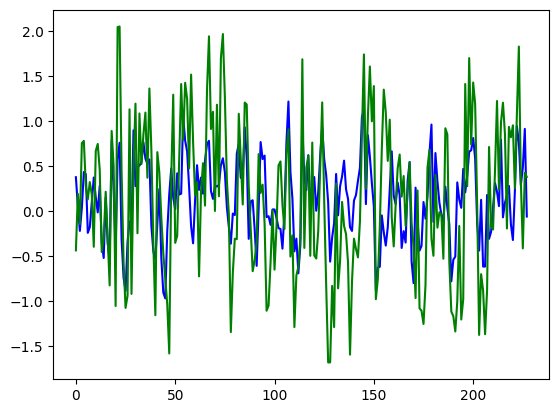

In [542]:
plt.plot(res, color='blue')
plt.plot(targets_df_test['Ticino'].values, color='green')

In [470]:
for i in range(clusterdf_train_withClass.shape[1]-len(clust_basins)):
    for j in clust_basins:
        clusterdf_train_withClass[clusterdf_train_withClass.columns[i]+'_'+j] = clusterdf_train_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_val_withClass[clusterdf_val_withClass.columns[i]+'_'+j] = clusterdf_val_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_test_withClass[clusterdf_test_withClass.columns[i]+'_'+j] = clusterdf_test_withClass.apply(lambda x:x[i]*x[j], axis=1)

clusterdf_train_withClass

,Adda_cyclostationary_mean_tg_1w_3,Adda_cyclostationary_mean_rr_12w_1,Adda_cyclostationary_mean_tg_16w_0,Adda_cyclostationary_mean_tg_24w_2,Adda_cyclostationary_mean_tg_24w_0,Lambro_Olona_cyclostationary_mean_tg_6,Lambro_Olona_cyclostationary_mean_rr_4w_1,Lambro_Olona_cyclostationary_mean_tg_0,Lambro_Olona_cyclostationary_mean_tg_4w_6,Lambro_Olona_cyclostationary_mean_tg_4w_5,...,Ticino_cyclostationary_mean_tg_0_Oglio_Iseo,Ticino_cyclostationary_mean_tg_0_Ticino,Ticino_cyclostationary_mean_rr_4w_0_Adda,Ticino_cyclostationary_mean_rr_4w_0_Lambro_Olona,Ticino_cyclostationary_mean_rr_4w_0_Oglio_Iseo,Ticino_cyclostationary_mean_rr_4w_0_Ticino,Ticino_cyclostationary_mean_tg_1_Adda,Ticino_cyclostationary_mean_tg_1_Lambro_Olona,Ticino_cyclostationary_mean_tg_1_Oglio_Iseo,Ticino_cyclostationary_mean_tg_1_Ticino
0,-0.862899,1.560382,1.711682,-2.770704,1.914831,-0.044884,1.663515,-0.277460,-0.075383,-0.156545,...,-0.0,-0.000000,0.611605,0.0,0.0,0.000000,-0.442197,-0.0,-0.0,-0.000000
1,-0.093639,5.036114,2.547788,-0.879312,2.856614,1.221277,2.277544,0.841342,0.882621,0.761360,...,0.0,0.000000,1.691336,0.0,0.0,0.000000,0.807518,0.0,0.0,0.000000
2,-0.524505,3.177144,1.634451,-2.052028,1.827839,-0.221646,1.355767,-0.526335,0.474126,0.269224,...,-0.0,-0.000000,0.832271,0.0,0.0,0.000000,-1.081813,-0.0,-0.0,-0.000000
3,-0.666293,3.205993,1.836713,-1.425685,2.055666,0.723165,1.429576,0.512276,0.627310,0.468910,...,0.0,0.000000,0.859041,0.0,0.0,0.000000,0.324392,0.0,0.0,0.000000
4,-0.416695,2.498195,1.795310,-1.994518,2.009029,-0.122716,0.994844,-0.056656,0.463215,0.444387,...,-0.0,-0.000000,0.647203,0.0,0.0,0.000000,-0.553079,-0.0,-0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1.568770,-1.467261,0.783570,1.524212,0.639345,1.014590,-1.098764,1.296972,-0.144871,0.565375,...,0.0,1.481505,-0.000000,-0.0,-0.0,-1.023397,0.000000,0.0,0.0,1.527659
407,0.812306,-0.715887,0.868596,1.477729,0.671680,0.250478,-0.476556,0.495148,0.358805,1.260203,...,0.0,0.121450,-0.000000,-0.0,-0.0,-0.154876,0.000000,0.0,0.0,0.019115
408,0.876968,-0.558495,0.899390,1.352693,0.504706,0.305326,-0.152527,0.445862,0.439528,1.444956,...,0.0,0.865426,0.000000,0.0,0.0,0.083449,0.000000,0.0,0.0,1.039841
409,-0.723696,-0.626439,0.725991,1.102009,0.391753,-1.995198,-0.192534,-1.610957,0.109550,1.067782,...,-0.0,-2.359776,0.000000,0.0,0.0,0.001375,-0.000000,-0.0,-0.0,-2.580108


In [471]:
model_ALOT_ohe = LinearRegression()
model_ALOT_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Adda==1].values)
print(r2_score(targets_df_test['Adda'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Lambro_Olona==1].values)
print(r2_score(targets_df_test['Lambro_Olona'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Oglio_Iseo==1].values)
print(r2_score(targets_df_test['Oglio_Iseo'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Ticino==1].values)
print(r2_score(targets_df_test['Ticino'].values, res))


0.2934203975293319
0.26426191622064354
0.15121968885589177
0.2495948097547407


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Dora - Piemonte_Nord - Piemonte_Sud: wrapper best 5

In [422]:
clust_basins = ['Dora', 'Piemonte_Nord', 'Piemonte_Sud']
colnames = [x for x in best5_wrapper_fulldf_train.columns if x.startswith('Dora') or x.startswith('Piemonte_Nord') or x.startswith('Piemonte_Sud')]

best5_wrapper_clusterdf_train_withClass = pd.DataFrame()
best5_wrapper_clusterdf_val_withClass = pd.DataFrame()
best5_wrapper_clusterdf_test_withClass = pd.DataFrame()

for i in range(len(clust_basins)):
    best5_wrapper_clusterdf_train_withClass = pd.concat((best5_wrapper_clusterdf_train_withClass,pd.concat((best5_wrapper_fulldf_train[colnames],pd.DataFrame(1+i*np.ones(len(best5_wrapper_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    best5_wrapper_clusterdf_val_withClass = pd.concat((best5_wrapper_clusterdf_val_withClass,pd.concat((best5_wrapper_fulldf_val[colnames],pd.DataFrame(1+i*np.ones(len(best5_wrapper_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    best5_wrapper_clusterdf_test_withClass = pd.concat((best5_wrapper_clusterdf_test_withClass,pd.concat((best5_wrapper_fulldf_test[colnames],pd.DataFrame(1+i*np.ones(len(best5_wrapper_fulldf_test)),columns=['basin'])),axis=1)),axis=0)

for i in range(len(clust_basins)):
    best5_wrapper_clusterdf_train_withClass[clust_basins[i]] = best5_wrapper_clusterdf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    best5_wrapper_clusterdf_val_withClass[clust_basins[i]] = best5_wrapper_clusterdf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    best5_wrapper_clusterdf_test_withClass[clust_basins[i]] = best5_wrapper_clusterdf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)

best5_wrapper_clusterdf_train_withClass = best5_wrapper_clusterdf_train_withClass.loc[:,best5_wrapper_clusterdf_train_withClass.columns != 'basin']
best5_wrapper_clusterdf_val_withClass = best5_wrapper_clusterdf_val_withClass.loc[:,best5_wrapper_clusterdf_val_withClass.columns != 'basin']
best5_wrapper_clusterdf_test_withClass = best5_wrapper_clusterdf_test_withClass.loc[:,best5_wrapper_clusterdf_test_withClass.columns != 'basin']


In [423]:
best5_wrapper_clusterdf_train_withClass

,Dora_cyclostationary_mean_tg_1w_0,Dora_cyclostationary_mean_rr_4w_1,Dora_cyclostationary_mean_tg_1w_2,Dora_cyclostationary_mean_tg_4w_1,Dora_cyclostationary_mean_tg_4w_0,Piemonte_Nord_cyclostationary_mean_tg_1w_3,Piemonte_Nord_cyclostationary_mean_rr_4w_0,Piemonte_Nord_cyclostationary_mean_rr_24w_0,Piemonte_Nord_cyclostationary_mean_tg_24w_0,Piemonte_Nord_cyclostationary_mean_tg_24w_1,Piemonte_Sud_cyclostationary_mean_tg_2,Piemonte_Sud_cyclostationary_mean_rr_24w_1,Piemonte_Sud_cyclostationary_mean_rr_1w_4,Piemonte_Sud_cyclostationary_mean_rr_16w_1,Piemonte_Sud_cyclostationary_mean_rr_16w_2,Dora,Piemonte_Nord,Piemonte_Sud
0,-0.858428,0.569944,-0.645734,-0.958059,-1.179177,-0.705198,0.531161,0.993156,-1.444933,-1.056852,-0.374151,1.722357,0.566795,5.503456,3.450706,1,0,0
1,-0.144075,2.777501,-0.040254,0.064877,-0.154668,-0.040533,1.141736,2.145937,0.399738,0.702337,0.845319,2.568972,1.162632,5.284243,3.406378,1,0,0
2,-0.543433,1.425829,-0.727940,-1.002116,-0.919496,-0.312340,0.600533,1.115539,-0.862634,-0.363026,-1.069465,1.502423,0.501665,3.124173,1.751610,1,0,0
3,-0.723360,1.785519,-0.924722,-0.601101,-0.594848,-0.434823,0.613627,1.140701,0.012866,0.053932,0.510716,1.463618,-0.074694,2.734133,1.878484,1,0,0
4,-0.540293,1.524603,-0.569035,-0.789653,-0.843317,-0.286705,0.408259,0.742092,-0.535961,-0.202521,-0.448734,0.854895,0.107268,1.874214,1.117130,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1.462830,-0.520256,1.585661,0.807565,0.577376,1.346423,-0.938846,-1.118138,1.192105,0.686556,1.056166,-1.165656,-0.617574,-0.419856,0.118142,0,0,1
407,0.599620,-0.530550,0.724000,1.020805,0.776516,0.509539,-0.559070,-0.904049,1.080238,0.646899,0.308611,-0.855699,-0.290505,0.087685,0.753294,0,0,1
408,0.344849,0.031726,0.422436,0.910086,0.715672,0.236097,-0.113738,-0.769506,0.967415,0.491266,0.651470,-0.755765,-0.235027,0.110292,0.728345,0,0,1
409,-1.130239,-0.154282,-1.116372,0.237759,0.083901,-1.353830,-0.253229,-0.635866,0.608651,0.209678,-2.101458,-0.632667,-0.224584,0.111368,0.550634,0,0,1


In [424]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in clust_basins:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)


In [425]:
model_DPNPS_ohe = LinearRegression()
model_DPNPS_ohe.fit(pd.concat((best5_wrapper_clusterdf_train_withClass,best5_wrapper_clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_DPNPS_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Dora==1].values)
print(r2_score(targets_df_test['Dora'].values, res))
res = model_DPNPS_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Piemonte_Nord==1].values)
print(r2_score(targets_df_test['Piemonte_Nord'].values, res))
res = model_DPNPS_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Piemonte_Sud==1].values)
print(r2_score(targets_df_test['Piemonte_Sud'].values, res))


-0.32287659170495364
-0.20871592974219433
-0.24715940372280998


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [426]:
for i in range(best5_wrapper_clusterdf_train_withClass.shape[1]-len(clust_basins)):
    for j in clust_basins:
        best5_wrapper_clusterdf_train_withClass[best5_wrapper_clusterdf_train_withClass.columns[i]+'_'+j] = best5_wrapper_clusterdf_train_withClass.apply(lambda x:x[i]*x[j], axis=1)
        best5_wrapper_clusterdf_val_withClass[best5_wrapper_clusterdf_val_withClass.columns[i]+'_'+j] = best5_wrapper_clusterdf_val_withClass.apply(lambda x:x[i]*x[j], axis=1)
        best5_wrapper_clusterdf_test_withClass[best5_wrapper_clusterdf_test_withClass.columns[i]+'_'+j] = best5_wrapper_clusterdf_test_withClass.apply(lambda x:x[i]*x[j], axis=1)

best5_wrapper_clusterdf_train_withClass

,Dora_cyclostationary_mean_tg_1w_0,Dora_cyclostationary_mean_rr_4w_1,Dora_cyclostationary_mean_tg_1w_2,Dora_cyclostationary_mean_tg_4w_1,Dora_cyclostationary_mean_tg_4w_0,Piemonte_Nord_cyclostationary_mean_tg_1w_3,Piemonte_Nord_cyclostationary_mean_rr_4w_0,Piemonte_Nord_cyclostationary_mean_rr_24w_0,Piemonte_Nord_cyclostationary_mean_tg_24w_0,Piemonte_Nord_cyclostationary_mean_tg_24w_1,...,Piemonte_Sud_cyclostationary_mean_rr_24w_1_Piemonte_Sud,Piemonte_Sud_cyclostationary_mean_rr_1w_4_Dora,Piemonte_Sud_cyclostationary_mean_rr_1w_4_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_rr_1w_4_Piemonte_Sud,Piemonte_Sud_cyclostationary_mean_rr_16w_1_Dora,Piemonte_Sud_cyclostationary_mean_rr_16w_1_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_rr_16w_1_Piemonte_Sud,Piemonte_Sud_cyclostationary_mean_rr_16w_2_Dora,Piemonte_Sud_cyclostationary_mean_rr_16w_2_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_rr_16w_2_Piemonte_Sud
0,-0.858428,0.569944,-0.645734,-0.958059,-1.179177,-0.705198,0.531161,0.993156,-1.444933,-1.056852,...,0.000000,0.566795,0.0,0.000000,5.503456,0.0,0.000000,3.450706,0.0,0.000000
1,-0.144075,2.777501,-0.040254,0.064877,-0.154668,-0.040533,1.141736,2.145937,0.399738,0.702337,...,0.000000,1.162632,0.0,0.000000,5.284243,0.0,0.000000,3.406378,0.0,0.000000
2,-0.543433,1.425829,-0.727940,-1.002116,-0.919496,-0.312340,0.600533,1.115539,-0.862634,-0.363026,...,0.000000,0.501665,0.0,0.000000,3.124173,0.0,0.000000,1.751610,0.0,0.000000
3,-0.723360,1.785519,-0.924722,-0.601101,-0.594848,-0.434823,0.613627,1.140701,0.012866,0.053932,...,0.000000,-0.074694,-0.0,-0.000000,2.734133,0.0,0.000000,1.878484,0.0,0.000000
4,-0.540293,1.524603,-0.569035,-0.789653,-0.843317,-0.286705,0.408259,0.742092,-0.535961,-0.202521,...,0.000000,0.107268,0.0,0.000000,1.874214,0.0,0.000000,1.117130,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1.462830,-0.520256,1.585661,0.807565,0.577376,1.346423,-0.938846,-1.118138,1.192105,0.686556,...,-1.165656,-0.000000,-0.0,-0.617574,-0.000000,-0.0,-0.419856,0.000000,0.0,0.118142
407,0.599620,-0.530550,0.724000,1.020805,0.776516,0.509539,-0.559070,-0.904049,1.080238,0.646899,...,-0.855699,-0.000000,-0.0,-0.290505,0.000000,0.0,0.087685,0.000000,0.0,0.753294
408,0.344849,0.031726,0.422436,0.910086,0.715672,0.236097,-0.113738,-0.769506,0.967415,0.491266,...,-0.755765,-0.000000,-0.0,-0.235027,0.000000,0.0,0.110292,0.000000,0.0,0.728345
409,-1.130239,-0.154282,-1.116372,0.237759,0.083901,-1.353830,-0.253229,-0.635866,0.608651,0.209678,...,-0.632667,-0.000000,-0.0,-0.224584,0.000000,0.0,0.111368,0.000000,0.0,0.550634


In [427]:
model_DPNPS_ohe = LinearRegression()
model_DPNPS_ohe.fit(pd.concat((best5_wrapper_clusterdf_train_withClass,best5_wrapper_clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_DPNPS_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Dora==1].values)
print(r2_score(targets_df_test['Dora'].values, res))
res = model_DPNPS_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Piemonte_Nord==1].values)
print(r2_score(targets_df_test['Piemonte_Nord'].values, res))
res = model_DPNPS_ohe.predict(best5_wrapper_clusterdf_test_withClass.loc[best5_wrapper_clusterdf_test_withClass.Piemonte_Sud==1].values)
print(r2_score(targets_df_test['Piemonte_Sud'].values, res))


-0.4605342062519393
-0.20089066605171646
-0.12280727670971792


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Dora - Piemonte_Nord - Piemonte_Sud: CMI

In [428]:
clust_basins = ['Dora', 'Piemonte_Nord', 'Piemonte_Sud']
colnames = [x for x in CMI_fulldf_train.columns if x.startswith('Dora') or x.startswith('Piemonte_Nord') or x.startswith('Piemonte_Sud')]

clusterdf_train_withClass = pd.DataFrame()
clusterdf_val_withClass = pd.DataFrame()
clusterdf_test_withClass = pd.DataFrame()

for i in range(len(clust_basins)):
    clusterdf_train_withClass = pd.concat((clusterdf_train_withClass,pd.concat((CMI_fulldf_train[colnames],pd.DataFrame(1+i*np.ones(len(CMI_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_val_withClass = pd.concat((clusterdf_val_withClass,pd.concat((CMI_fulldf_val[colnames],pd.DataFrame(1+i*np.ones(len(CMI_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_test_withClass = pd.concat((clusterdf_test_withClass,pd.concat((CMI_fulldf_test[colnames],pd.DataFrame(1+i*np.ones(len(CMI_fulldf_test)),columns=['basin'])),axis=1)),axis=0)

for i in range(len(clust_basins)):
    clusterdf_train_withClass[clust_basins[i]] = clusterdf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_val_withClass[clust_basins[i]] = clusterdf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_test_withClass[clust_basins[i]] = clusterdf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)

clusterdf_train_withClass = clusterdf_train_withClass.loc[:,clusterdf_train_withClass.columns != 'basin']
clusterdf_val_withClass = clusterdf_val_withClass.loc[:,clusterdf_val_withClass.columns != 'basin']
clusterdf_test_withClass = clusterdf_test_withClass.loc[:,clusterdf_test_withClass.columns != 'basin']


In [429]:
clusterdf_train_withClass

,Dora_cyclostationary_mean_tg_4w_1,Dora_cyclostationary_mean_tg_12w_0,Dora_cyclostationary_mean_rr_4w_0,Dora_cyclostationary_mean_tg_24w_1,Dora_cyclostationary_mean_tg_24w_2,Piemonte_Nord_cyclostationary_mean_tg_3,Piemonte_Nord_cyclostationary_mean_rr_4w_0,Piemonte_Nord_cyclostationary_mean_tg_1w_1,Piemonte_Nord_cyclostationary_mean_tg_1w_3,Piemonte_Nord_cyclostationary_mean_tg_1w_4,Piemonte_Sud_cyclostationary_mean_tg_0,Piemonte_Sud_cyclostationary_mean_rr_24w_0,Piemonte_Sud_cyclostationary_mean_rr_8w_0,Piemonte_Sud_cyclostationary_mean_rr_12w_1,Piemonte_Sud_cyclostationary_mean_tg_1w_0,Dora,Piemonte_Nord,Piemonte_Sud
0,-0.958059,-1.692206,-0.181114,-1.852227,-1.694637,-0.483868,0.531161,-0.070058,-0.705198,-0.039471,-0.449672,3.146477,1.939769,3.863262,-0.551685,1,0,0
1,0.064877,-0.279226,0.886182,-0.351196,0.267105,0.673096,1.141736,0.669777,-0.040533,0.697310,0.880344,3.822355,2.431148,4.345114,0.256218,1,0,0
2,-1.002116,-1.256740,0.223731,-2.234919,-1.713098,-0.898083,0.600533,0.518292,-0.312340,0.527444,-0.833249,2.115109,1.348554,2.533689,0.029187,1,0,0
3,-0.601101,-0.825053,0.383765,-1.590347,-0.953714,0.358463,0.613627,0.245062,-0.434823,0.271867,0.865639,2.006293,1.282061,2.314067,0.023661,1,0,0
4,-0.789653,-1.182962,0.295643,-1.665547,-1.374058,-0.555381,0.408259,0.468525,-0.286705,0.537510,-0.246418,1.307787,0.836693,1.603089,0.376389,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,0.807565,1.079275,-0.712766,1.021359,0.953999,0.862196,-0.938846,0.949782,1.346423,0.952736,1.374448,-0.767792,-0.476107,-0.467565,1.427917,0,0,1
407,1.020805,0.749908,-0.597343,1.000397,0.900047,-0.160042,-0.559070,0.569543,0.509539,0.579810,-0.119108,-0.482430,-0.420562,0.030758,0.760111,0,0,1
408,0.910086,0.754701,-0.152386,0.925106,0.802985,0.528382,-0.113738,0.111790,0.236097,0.086513,0.643035,-0.396456,-0.215110,0.110519,0.315694,0,0,1
409,0.237759,0.155479,-0.396304,0.610253,0.441811,-2.715411,-0.253229,-1.115423,-1.353830,-1.099133,-2.247923,-0.311937,-0.353737,0.230804,-0.971253,0,0,1


In [430]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in clust_basins:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)


In [431]:
model_DPNPS_ohe = LinearRegression()
model_DPNPS_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Dora==1].values)
print(r2_score(targets_df_test['Dora'].values, res))
res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Nord==1].values)
print(r2_score(targets_df_test['Piemonte_Nord'].values, res))
res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Sud==1].values)
print(r2_score(targets_df_test['Piemonte_Sud'].values, res))


-0.6392008270590532
-0.4196218844269948
-0.49841482385224056


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [433]:
for i in range(clusterdf_train_withClass.shape[1]-len(clust_basins)):
    for j in clust_basins:
        clusterdf_train_withClass[clusterdf_train_withClass.columns[i]+'_'+j] = clusterdf_train_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_val_withClass[clusterdf_val_withClass.columns[i]+'_'+j] = clusterdf_val_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_test_withClass[clusterdf_test_withClass.columns[i]+'_'+j] = clusterdf_test_withClass.apply(lambda x:x[i]*x[j], axis=1)

clusterdf_train_withClass

,Dora_cyclostationary_mean_tg_4w_1,Dora_cyclostationary_mean_tg_12w_0,Dora_cyclostationary_mean_rr_4w_0,Dora_cyclostationary_mean_tg_24w_1,Dora_cyclostationary_mean_tg_24w_2,Piemonte_Nord_cyclostationary_mean_tg_3,Piemonte_Nord_cyclostationary_mean_rr_4w_0,Piemonte_Nord_cyclostationary_mean_tg_1w_1,Piemonte_Nord_cyclostationary_mean_tg_1w_3,Piemonte_Nord_cyclostationary_mean_tg_1w_4,...,Piemonte_Sud_cyclostationary_mean_rr_24w_0_Piemonte_Sud,Piemonte_Sud_cyclostationary_mean_rr_8w_0_Dora,Piemonte_Sud_cyclostationary_mean_rr_8w_0_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_rr_8w_0_Piemonte_Sud,Piemonte_Sud_cyclostationary_mean_rr_12w_1_Dora,Piemonte_Sud_cyclostationary_mean_rr_12w_1_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_rr_12w_1_Piemonte_Sud,Piemonte_Sud_cyclostationary_mean_tg_1w_0_Dora,Piemonte_Sud_cyclostationary_mean_tg_1w_0_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_tg_1w_0_Piemonte_Sud
0,-0.958059,-1.692206,-0.181114,-1.852227,-1.694637,-0.483868,0.531161,-0.070058,-0.705198,-0.039471,...,0.000000,1.939769,0.0,0.000000,3.863262,0.0,0.000000,-0.551685,-0.0,-0.000000
1,0.064877,-0.279226,0.886182,-0.351196,0.267105,0.673096,1.141736,0.669777,-0.040533,0.697310,...,0.000000,2.431148,0.0,0.000000,4.345114,0.0,0.000000,0.256218,0.0,0.000000
2,-1.002116,-1.256740,0.223731,-2.234919,-1.713098,-0.898083,0.600533,0.518292,-0.312340,0.527444,...,0.000000,1.348554,0.0,0.000000,2.533689,0.0,0.000000,0.029187,0.0,0.000000
3,-0.601101,-0.825053,0.383765,-1.590347,-0.953714,0.358463,0.613627,0.245062,-0.434823,0.271867,...,0.000000,1.282061,0.0,0.000000,2.314067,0.0,0.000000,0.023661,0.0,0.000000
4,-0.789653,-1.182962,0.295643,-1.665547,-1.374058,-0.555381,0.408259,0.468525,-0.286705,0.537510,...,0.000000,0.836693,0.0,0.000000,1.603089,0.0,0.000000,0.376389,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,0.807565,1.079275,-0.712766,1.021359,0.953999,0.862196,-0.938846,0.949782,1.346423,0.952736,...,-0.767792,-0.000000,-0.0,-0.476107,-0.000000,-0.0,-0.467565,0.000000,0.0,1.427917
407,1.020805,0.749908,-0.597343,1.000397,0.900047,-0.160042,-0.559070,0.569543,0.509539,0.579810,...,-0.482430,-0.000000,-0.0,-0.420562,0.000000,0.0,0.030758,0.000000,0.0,0.760111
408,0.910086,0.754701,-0.152386,0.925106,0.802985,0.528382,-0.113738,0.111790,0.236097,0.086513,...,-0.396456,-0.000000,-0.0,-0.215110,0.000000,0.0,0.110519,0.000000,0.0,0.315694
409,0.237759,0.155479,-0.396304,0.610253,0.441811,-2.715411,-0.253229,-1.115423,-1.353830,-1.099133,...,-0.311937,-0.000000,-0.0,-0.353737,0.000000,0.0,0.230804,-0.000000,-0.0,-0.971253


In [434]:
model_DPNPS_ohe = LinearRegression()
model_DPNPS_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Dora==1].values)
print(r2_score(targets_df_test['Dora'].values, res))
res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Nord==1].values)
print(r2_score(targets_df_test['Piemonte_Nord'].values, res))
res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Sud==1].values)
print(r2_score(targets_df_test['Piemonte_Sud'].values, res))


-1.4233289032849736
-0.18216047822349557
-0.3055385087801512


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Dora - Piemonte_Nord - Piemonte_Sud: CMI best 5

In [559]:
clust_basins = ['Dora', 'Piemonte_Nord', 'Piemonte_Sud']
colnames = [x for x in best5_CMI_fulldf_train.columns if x.startswith('Dora') or x.startswith('Piemonte_Nord') or x.startswith('Piemonte_Sud')]

clusterdf_train_withClass = pd.DataFrame()
clusterdf_val_withClass = pd.DataFrame()
clusterdf_test_withClass = pd.DataFrame()

for i in range(len(clust_basins)):
    clusterdf_train_withClass = pd.concat((clusterdf_train_withClass,pd.concat((best5_CMI_fulldf_train[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_val_withClass = pd.concat((clusterdf_val_withClass,pd.concat((best5_CMI_fulldf_val[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_test_withClass = pd.concat((clusterdf_test_withClass,pd.concat((best5_CMI_fulldf_test[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_test)),columns=['basin'])),axis=1)),axis=0)

for i in range(len(clust_basins)):
    clusterdf_train_withClass[clust_basins[i]] = clusterdf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_val_withClass[clust_basins[i]] = clusterdf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_test_withClass[clust_basins[i]] = clusterdf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)

clusterdf_train_withClass = clusterdf_train_withClass.loc[:,clusterdf_train_withClass.columns != 'basin']
clusterdf_val_withClass = clusterdf_val_withClass.loc[:,clusterdf_val_withClass.columns != 'basin']
clusterdf_test_withClass = clusterdf_test_withClass.loc[:,clusterdf_test_withClass.columns != 'basin']


In [560]:
clusterdf_train_withClass

,Dora_cyclostationary_mean_tg_4w_1,Dora_cyclostationary_mean_tg_12w_0,Dora_cyclostationary_mean_rr_4w_0,Dora_cyclostationary_mean_tg_24w_1,Dora_cyclostationary_mean_tg_24w_2,Piemonte_Nord_cyclostationary_mean_tg_3,Piemonte_Nord_cyclostationary_mean_rr_4w_0,Piemonte_Nord_cyclostationary_mean_tg_1w_1,Piemonte_Nord_cyclostationary_mean_tg_1w_3,Piemonte_Nord_cyclostationary_mean_tg_1w_4,Piemonte_Sud_cyclostationary_mean_tg_0,Piemonte_Sud_cyclostationary_mean_rr_24w_0,Piemonte_Sud_cyclostationary_mean_rr_8w_0,Piemonte_Sud_cyclostationary_mean_rr_12w_1,Piemonte_Sud_cyclostationary_mean_tg_1w_0,Dora,Piemonte_Nord,Piemonte_Sud
0,-0.958059,-1.692206,-0.181114,-1.852227,-1.694637,-0.483868,0.531161,-0.070058,-0.705198,-0.039471,-0.449672,3.146477,1.939769,3.863262,-0.551685,1,0,0
1,0.064877,-0.279226,0.886182,-0.351196,0.267105,0.673096,1.141736,0.669777,-0.040533,0.697310,0.880344,3.822355,2.431148,4.345114,0.256218,1,0,0
2,-1.002116,-1.256740,0.223731,-2.234919,-1.713098,-0.898083,0.600533,0.518292,-0.312340,0.527444,-0.833249,2.115109,1.348554,2.533689,0.029187,1,0,0
3,-0.601101,-0.825053,0.383765,-1.590347,-0.953714,0.358463,0.613627,0.245062,-0.434823,0.271867,0.865639,2.006293,1.282061,2.314067,0.023661,1,0,0
4,-0.789653,-1.182962,0.295643,-1.665547,-1.374058,-0.555381,0.408259,0.468525,-0.286705,0.537510,-0.246418,1.307787,0.836693,1.603089,0.376389,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,0.807565,1.079275,-0.712766,1.021359,0.953999,0.862196,-0.938846,0.949782,1.346423,0.952736,1.374448,-0.767792,-0.476107,-0.467565,1.427917,0,0,1
407,1.020805,0.749908,-0.597343,1.000397,0.900047,-0.160042,-0.559070,0.569543,0.509539,0.579810,-0.119108,-0.482430,-0.420562,0.030758,0.760111,0,0,1
408,0.910086,0.754701,-0.152386,0.925106,0.802985,0.528382,-0.113738,0.111790,0.236097,0.086513,0.643035,-0.396456,-0.215110,0.110519,0.315694,0,0,1
409,0.237759,0.155479,-0.396304,0.610253,0.441811,-2.715411,-0.253229,-1.115423,-1.353830,-1.099133,-2.247923,-0.311937,-0.353737,0.230804,-0.971253,0,0,1


In [561]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in clust_basins:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)


In [562]:
model_DPNPS_ohe = LinearRegression()
model_DPNPS_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Dora==1].values)
print(r2_score(targets_df_test['Dora'].values, res))
res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Nord==1].values)
print(r2_score(targets_df_test['Piemonte_Nord'].values, res))
res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Sud==1].values)
print(r2_score(targets_df_test['Piemonte_Sud'].values, res))


-0.6392008270590532
-0.4196218844269948
-0.49841482385224056


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [580]:
### Ridge and Lasso
from sklearn.linear_model import Ridge

model_DPNPS_ridge = Ridge(alpha=1000.0)
model_DPNPS_ridge.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_DPNPS_ridge.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Dora==1].values)
print(r2_score(targets_df_test['Dora'].values, res))
res = model_DPNPS_ridge.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Nord==1].values)
print(r2_score(targets_df_test['Piemonte_Nord'].values, res))
res = model_DPNPS_ridge.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Sud==1].values)
print(r2_score(targets_df_test['Piemonte_Sud'].values, res))

### Ridge and Lasso
from sklearn.linear_model import Lasso

model_DPNPS_Lasso = Lasso(alpha=1.0)
model_DPNPS_Lasso.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_DPNPS_Lasso.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Dora==1].values)
print(r2_score(targets_df_test['Dora'].values, res))
res = model_DPNPS_Lasso.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Nord==1].values)
print(r2_score(targets_df_test['Piemonte_Nord'].values, res))
res = model_DPNPS_Lasso.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Sud==1].values)
print(r2_score(targets_df_test['Piemonte_Sud'].values, res))


-0.01504430512315813
0.13117472371892347
0.05676185616132012
-0.03601767681354562
-0.005255834060018172
-0.0031161954632632494


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [583]:
model_DPNPS_ridge.coef_

array([[ 0.02711149, -0.03885853,  0.07353019,  0.07686813,  0.02255927,
        -0.09960836,  0.0584774 , -0.03485143, -0.06731712, -0.02067332,
        -0.06599726,  0.09936724, -0.00150094, -0.02554435, -0.0359069 ,
        -0.01003827,  0.0052231 ,  0.00481518]])

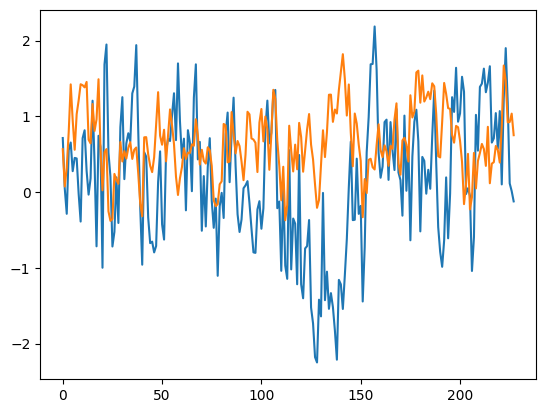

In [574]:
plt.plot(targets_df_test['Piemonte_Sud'].values)
plt.plot(res)

In [439]:
for i in range(clusterdf_train_withClass.shape[1]-len(clust_basins)):
    for j in clust_basins:
        clusterdf_train_withClass[clusterdf_train_withClass.columns[i]+'_'+j] = clusterdf_train_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_val_withClass[clusterdf_val_withClass.columns[i]+'_'+j] = clusterdf_val_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_test_withClass[clusterdf_test_withClass.columns[i]+'_'+j] = clusterdf_test_withClass.apply(lambda x:x[i]*x[j], axis=1)

clusterdf_train_withClass

,Dora_cyclostationary_mean_tg_4w_1,Dora_cyclostationary_mean_tg_12w_0,Dora_cyclostationary_mean_rr_4w_0,Dora_cyclostationary_mean_tg_24w_1,Dora_cyclostationary_mean_tg_24w_2,Piemonte_Nord_cyclostationary_mean_tg_3,Piemonte_Nord_cyclostationary_mean_rr_4w_0,Piemonte_Nord_cyclostationary_mean_tg_1w_1,Piemonte_Nord_cyclostationary_mean_tg_1w_3,Piemonte_Nord_cyclostationary_mean_tg_1w_4,...,Piemonte_Sud_cyclostationary_mean_rr_24w_0_Piemonte_Sud,Piemonte_Sud_cyclostationary_mean_rr_8w_0_Dora,Piemonte_Sud_cyclostationary_mean_rr_8w_0_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_rr_8w_0_Piemonte_Sud,Piemonte_Sud_cyclostationary_mean_rr_12w_1_Dora,Piemonte_Sud_cyclostationary_mean_rr_12w_1_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_rr_12w_1_Piemonte_Sud,Piemonte_Sud_cyclostationary_mean_tg_1w_0_Dora,Piemonte_Sud_cyclostationary_mean_tg_1w_0_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_tg_1w_0_Piemonte_Sud
0,-0.958059,-1.692206,-0.181114,-1.852227,-1.694637,-0.483868,0.531161,-0.070058,-0.705198,-0.039471,...,0.000000,1.939769,0.0,0.000000,3.863262,0.0,0.000000,-0.551685,-0.0,-0.000000
1,0.064877,-0.279226,0.886182,-0.351196,0.267105,0.673096,1.141736,0.669777,-0.040533,0.697310,...,0.000000,2.431148,0.0,0.000000,4.345114,0.0,0.000000,0.256218,0.0,0.000000
2,-1.002116,-1.256740,0.223731,-2.234919,-1.713098,-0.898083,0.600533,0.518292,-0.312340,0.527444,...,0.000000,1.348554,0.0,0.000000,2.533689,0.0,0.000000,0.029187,0.0,0.000000
3,-0.601101,-0.825053,0.383765,-1.590347,-0.953714,0.358463,0.613627,0.245062,-0.434823,0.271867,...,0.000000,1.282061,0.0,0.000000,2.314067,0.0,0.000000,0.023661,0.0,0.000000
4,-0.789653,-1.182962,0.295643,-1.665547,-1.374058,-0.555381,0.408259,0.468525,-0.286705,0.537510,...,0.000000,0.836693,0.0,0.000000,1.603089,0.0,0.000000,0.376389,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,0.807565,1.079275,-0.712766,1.021359,0.953999,0.862196,-0.938846,0.949782,1.346423,0.952736,...,-0.767792,-0.000000,-0.0,-0.476107,-0.000000,-0.0,-0.467565,0.000000,0.0,1.427917
407,1.020805,0.749908,-0.597343,1.000397,0.900047,-0.160042,-0.559070,0.569543,0.509539,0.579810,...,-0.482430,-0.000000,-0.0,-0.420562,0.000000,0.0,0.030758,0.000000,0.0,0.760111
408,0.910086,0.754701,-0.152386,0.925106,0.802985,0.528382,-0.113738,0.111790,0.236097,0.086513,...,-0.396456,-0.000000,-0.0,-0.215110,0.000000,0.0,0.110519,0.000000,0.0,0.315694
409,0.237759,0.155479,-0.396304,0.610253,0.441811,-2.715411,-0.253229,-1.115423,-1.353830,-1.099133,...,-0.311937,-0.000000,-0.0,-0.353737,0.000000,0.0,0.230804,-0.000000,-0.0,-0.971253


In [440]:
model_DPNPS_ohe = LinearRegression()
model_DPNPS_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Dora==1].values)
print(r2_score(targets_df_test['Dora'].values, res))
res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Nord==1].values)
print(r2_score(targets_df_test['Piemonte_Nord'].values, res))
res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Sud==1].values)
print(r2_score(targets_df_test['Piemonte_Sud'].values, res))


-1.4233289032849736
-0.18216047822349557
-0.3055385087801512


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Piemonte_Nord - Piemonte_Sud: CMI best 5

In [555]:
clust_basins = ['Piemonte_Nord', 'Piemonte_Sud']
colnames = [x for x in best5_CMI_fulldf_train.columns if x.startswith('Piemonte_Nord') or x.startswith('Piemonte_Sud')]

clusterdf_train_withClass = pd.DataFrame()
clusterdf_val_withClass = pd.DataFrame()
clusterdf_test_withClass = pd.DataFrame()

for i in range(len(clust_basins)):
    clusterdf_train_withClass = pd.concat((clusterdf_train_withClass,pd.concat((best5_CMI_fulldf_train[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_val_withClass = pd.concat((clusterdf_val_withClass,pd.concat((best5_CMI_fulldf_val[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_test_withClass = pd.concat((clusterdf_test_withClass,pd.concat((best5_CMI_fulldf_test[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_test)),columns=['basin'])),axis=1)),axis=0)

for i in range(len(clust_basins)):
    clusterdf_train_withClass[clust_basins[i]] = clusterdf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_val_withClass[clust_basins[i]] = clusterdf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_test_withClass[clust_basins[i]] = clusterdf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)

clusterdf_train_withClass = clusterdf_train_withClass.loc[:,clusterdf_train_withClass.columns != 'basin']
clusterdf_val_withClass = clusterdf_val_withClass.loc[:,clusterdf_val_withClass.columns != 'basin']
clusterdf_test_withClass = clusterdf_test_withClass.loc[:,clusterdf_test_withClass.columns != 'basin']


In [556]:
clusterdf_train_withClass

,Piemonte_Nord_cyclostationary_mean_tg_3,Piemonte_Nord_cyclostationary_mean_rr_4w_0,Piemonte_Nord_cyclostationary_mean_tg_1w_1,Piemonte_Nord_cyclostationary_mean_tg_1w_3,Piemonte_Nord_cyclostationary_mean_tg_1w_4,Piemonte_Sud_cyclostationary_mean_tg_0,Piemonte_Sud_cyclostationary_mean_rr_24w_0,Piemonte_Sud_cyclostationary_mean_rr_8w_0,Piemonte_Sud_cyclostationary_mean_rr_12w_1,Piemonte_Sud_cyclostationary_mean_tg_1w_0,Piemonte_Nord,Piemonte_Sud
0,-0.483868,0.531161,-0.070058,-0.705198,-0.039471,-0.449672,3.146477,1.939769,3.863262,-0.551685,1,0
1,0.673096,1.141736,0.669777,-0.040533,0.697310,0.880344,3.822355,2.431148,4.345114,0.256218,1,0
2,-0.898083,0.600533,0.518292,-0.312340,0.527444,-0.833249,2.115109,1.348554,2.533689,0.029187,1,0
3,0.358463,0.613627,0.245062,-0.434823,0.271867,0.865639,2.006293,1.282061,2.314067,0.023661,1,0
4,-0.555381,0.408259,0.468525,-0.286705,0.537510,-0.246418,1.307787,0.836693,1.603089,0.376389,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
406,0.862196,-0.938846,0.949782,1.346423,0.952736,1.374448,-0.767792,-0.476107,-0.467565,1.427917,0,1
407,-0.160042,-0.559070,0.569543,0.509539,0.579810,-0.119108,-0.482430,-0.420562,0.030758,0.760111,0,1
408,0.528382,-0.113738,0.111790,0.236097,0.086513,0.643035,-0.396456,-0.215110,0.110519,0.315694,0,1
409,-2.715411,-0.253229,-1.115423,-1.353830,-1.099133,-2.247923,-0.311937,-0.353737,0.230804,-0.971253,0,1


In [557]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in clust_basins:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)


In [444]:
targets_df_train_unfolded

,0
0,-1.146332
1,0.371173
2,0.379474
3,-0.099118
4,-0.292244
...,...
817,-0.021388
818,-0.086330
819,0.576347
820,0.146632


In [558]:
model_DPNPS_ohe = LinearRegression()
model_DPNPS_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Nord==1].values)
print(r2_score(targets_df_test['Piemonte_Nord'].values, res))
res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Sud==1].values)
print(r2_score(targets_df_test['Piemonte_Sud'].values, res))


0.06977081725961665
-0.01398677438947682


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [446]:
for i in range(clusterdf_train_withClass.shape[1]-len(clust_basins)):
    for j in clust_basins:
        clusterdf_train_withClass[clusterdf_train_withClass.columns[i]+'_'+j] = clusterdf_train_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_val_withClass[clusterdf_val_withClass.columns[i]+'_'+j] = clusterdf_val_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_test_withClass[clusterdf_test_withClass.columns[i]+'_'+j] = clusterdf_test_withClass.apply(lambda x:x[i]*x[j], axis=1)

clusterdf_train_withClass

,Piemonte_Nord_cyclostationary_mean_tg_3,Piemonte_Nord_cyclostationary_mean_rr_4w_0,Piemonte_Nord_cyclostationary_mean_tg_1w_1,Piemonte_Nord_cyclostationary_mean_tg_1w_3,Piemonte_Nord_cyclostationary_mean_tg_1w_4,Piemonte_Sud_cyclostationary_mean_tg_0,Piemonte_Sud_cyclostationary_mean_rr_24w_0,Piemonte_Sud_cyclostationary_mean_rr_8w_0,Piemonte_Sud_cyclostationary_mean_rr_12w_1,Piemonte_Sud_cyclostationary_mean_tg_1w_0,...,Piemonte_Sud_cyclostationary_mean_tg_0_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_tg_0_Piemonte_Sud,Piemonte_Sud_cyclostationary_mean_rr_24w_0_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_rr_24w_0_Piemonte_Sud,Piemonte_Sud_cyclostationary_mean_rr_8w_0_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_rr_8w_0_Piemonte_Sud,Piemonte_Sud_cyclostationary_mean_rr_12w_1_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_rr_12w_1_Piemonte_Sud,Piemonte_Sud_cyclostationary_mean_tg_1w_0_Piemonte_Nord,Piemonte_Sud_cyclostationary_mean_tg_1w_0_Piemonte_Sud
0,-0.483868,0.531161,-0.070058,-0.705198,-0.039471,-0.449672,3.146477,1.939769,3.863262,-0.551685,...,-0.449672,-0.000000,3.146477,0.000000,1.939769,0.000000,3.863262,0.000000,-0.551685,-0.000000
1,0.673096,1.141736,0.669777,-0.040533,0.697310,0.880344,3.822355,2.431148,4.345114,0.256218,...,0.880344,0.000000,3.822355,0.000000,2.431148,0.000000,4.345114,0.000000,0.256218,0.000000
2,-0.898083,0.600533,0.518292,-0.312340,0.527444,-0.833249,2.115109,1.348554,2.533689,0.029187,...,-0.833249,-0.000000,2.115109,0.000000,1.348554,0.000000,2.533689,0.000000,0.029187,0.000000
3,0.358463,0.613627,0.245062,-0.434823,0.271867,0.865639,2.006293,1.282061,2.314067,0.023661,...,0.865639,0.000000,2.006293,0.000000,1.282061,0.000000,2.314067,0.000000,0.023661,0.000000
4,-0.555381,0.408259,0.468525,-0.286705,0.537510,-0.246418,1.307787,0.836693,1.603089,0.376389,...,-0.246418,-0.000000,1.307787,0.000000,0.836693,0.000000,1.603089,0.000000,0.376389,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,0.862196,-0.938846,0.949782,1.346423,0.952736,1.374448,-0.767792,-0.476107,-0.467565,1.427917,...,0.000000,1.374448,-0.000000,-0.767792,-0.000000,-0.476107,-0.000000,-0.467565,0.000000,1.427917
407,-0.160042,-0.559070,0.569543,0.509539,0.579810,-0.119108,-0.482430,-0.420562,0.030758,0.760111,...,-0.000000,-0.119108,-0.000000,-0.482430,-0.000000,-0.420562,0.000000,0.030758,0.000000,0.760111
408,0.528382,-0.113738,0.111790,0.236097,0.086513,0.643035,-0.396456,-0.215110,0.110519,0.315694,...,0.000000,0.643035,-0.000000,-0.396456,-0.000000,-0.215110,0.000000,0.110519,0.000000,0.315694
409,-2.715411,-0.253229,-1.115423,-1.353830,-1.099133,-2.247923,-0.311937,-0.353737,0.230804,-0.971253,...,-0.000000,-2.247923,-0.000000,-0.311937,-0.000000,-0.353737,0.000000,0.230804,-0.000000,-0.971253


In [447]:
model_DPNPS_ohe = LinearRegression()
model_DPNPS_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Nord==1].values)
print(r2_score(targets_df_test['Piemonte_Nord'].values, res))
res = model_DPNPS_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Sud==1].values)
print(r2_score(targets_df_test['Piemonte_Sud'].values, res))


0.04132440440468077
0.017446449998085978


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Adda - Lambro_Olona - Oglio_Iseo - Ticino - Piemonte Sud - Piemonte Nord: CMI best 5

In [515]:
clust_basins = ['Adda', 'Lambro_Olona', 'Oglio_Iseo', 'Ticino', 'Piemonte_Nord', 'Piemonte_Sud']
colnames = [x for x in best5_CMI_fulldf_train.columns if x.startswith('Adda') or x.startswith('Lambro_Olona') or x.startswith('Oglio_Iseo') or x.startswith('Ticino') or x.startswith('Piemonte_Nord') or x.startswith('Piemonte_Sud')]

clusterdf_train_withClass = pd.DataFrame()
clusterdf_val_withClass = pd.DataFrame()
clusterdf_test_withClass = pd.DataFrame()

for i in range(len(clust_basins)):
    clusterdf_train_withClass = pd.concat((clusterdf_train_withClass,pd.concat((best5_CMI_fulldf_train[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_train)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_val_withClass = pd.concat((clusterdf_val_withClass,pd.concat((best5_CMI_fulldf_val[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_val)),columns=['basin'])),axis=1)),axis=0)
    clusterdf_test_withClass = pd.concat((clusterdf_test_withClass,pd.concat((best5_CMI_fulldf_test[colnames],pd.DataFrame(1+i*np.ones(len(best5_CMI_fulldf_test)),columns=['basin'])),axis=1)),axis=0)

for i in range(len(clust_basins)):
    clusterdf_train_withClass[clust_basins[i]] = clusterdf_train_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_val_withClass[clust_basins[i]] = clusterdf_val_withClass.apply(lambda x: int(x.basin==i+1),axis=1)
    clusterdf_test_withClass[clust_basins[i]] = clusterdf_test_withClass.apply(lambda x: int(x.basin==i+1),axis=1)

clusterdf_train_withClass = clusterdf_train_withClass.loc[:,clusterdf_train_withClass.columns != 'basin']
clusterdf_val_withClass = clusterdf_val_withClass.loc[:,clusterdf_val_withClass.columns != 'basin']
clusterdf_test_withClass = clusterdf_test_withClass.loc[:,clusterdf_test_withClass.columns != 'basin']


In [516]:
clusterdf_train_withClass

,Adda_cyclostationary_mean_tg_1w_3,Adda_cyclostationary_mean_rr_12w_1,Adda_cyclostationary_mean_tg_16w_0,Adda_cyclostationary_mean_tg_24w_2,Adda_cyclostationary_mean_tg_24w_0,Lambro_Olona_cyclostationary_mean_tg_6,Lambro_Olona_cyclostationary_mean_rr_4w_1,Lambro_Olona_cyclostationary_mean_tg_0,Lambro_Olona_cyclostationary_mean_tg_4w_6,Lambro_Olona_cyclostationary_mean_tg_4w_5,...,Piemonte_Sud_cyclostationary_mean_tg_1w_0,Ticino_cyclostationary_mean_tg_0,Ticino_cyclostationary_mean_rr_4w_0,Ticino_cyclostationary_mean_tg_1,Adda,Lambro_Olona,Oglio_Iseo,Ticino,Piemonte_Nord,Piemonte_Sud
0,-0.862899,1.560382,1.711682,-2.770704,1.914831,-0.044884,1.663515,-0.277460,-0.075383,-0.156545,...,-0.551685,-0.432799,0.611605,-0.442197,1,0,0,0,0,0
1,-0.093639,5.036114,2.547788,-0.879312,2.856614,1.221277,2.277544,0.841342,0.882621,0.761360,...,0.256218,0.776085,1.691336,0.807518,1,0,0,0,0,0
2,-0.524505,3.177144,1.634451,-2.052028,1.827839,-0.221646,1.355767,-0.526335,0.474126,0.269224,...,0.029187,-0.906320,0.832271,-1.081813,1,0,0,0,0,0
3,-0.666293,3.205993,1.836713,-1.425685,2.055666,0.723165,1.429576,0.512276,0.627310,0.468910,...,0.023661,0.529173,0.859041,0.324392,1,0,0,0,0,0
4,-0.416695,2.498195,1.795310,-1.994518,2.009029,-0.122716,0.994844,-0.056656,0.463215,0.444387,...,0.376389,-0.687667,0.647203,-0.553079,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1.568770,-1.467261,0.783570,1.524212,0.639345,1.014590,-1.098764,1.296972,-0.144871,0.565375,...,1.427917,1.481505,-1.023397,1.527659,0,0,0,0,0,1
407,0.812306,-0.715887,0.868596,1.477729,0.671680,0.250478,-0.476556,0.495148,0.358805,1.260203,...,0.760111,0.121450,-0.154876,0.019115,0,0,0,0,0,1
408,0.876968,-0.558495,0.899390,1.352693,0.504706,0.305326,-0.152527,0.445862,0.439528,1.444956,...,0.315694,0.865426,0.083449,1.039841,0,0,0,0,0,1
409,-0.723696,-0.626439,0.725991,1.102009,0.391753,-1.995198,-0.192534,-1.610957,0.109550,1.067782,...,-0.971253,-2.359776,0.001375,-2.580108,0,0,0,0,0,1


In [517]:
targets_df_train_unfolded = pd.DataFrame()
targets_df_val_unfolded = pd.DataFrame()
targets_df_test_unfolded = pd.DataFrame()

for basin in clust_basins:
    targets_df_train_unfolded =  pd.concat((targets_df_train_unfolded,targets_df_train[basin]),axis=0)
    targets_df_val_unfolded =  pd.concat((targets_df_val_unfolded,targets_df_val[basin]),axis=0)
    targets_df_test_unfolded =  pd.concat((targets_df_test_unfolded,targets_df_test[basin]),axis=0)
targets_df_train_unfolded = targets_df_train_unfolded.reset_index(drop=True)
targets_df_val_unfolded = targets_df_val_unfolded.reset_index(drop=True)
targets_df_test_unfolded = targets_df_test_unfolded.reset_index(drop=True)


In [518]:
targets_df_train_unfolded

,0
0,-2.546951
1,-0.277191
2,-0.534156
3,-0.666789
4,-0.447894
...,...
2461,-0.021388
2462,-0.086330
2463,0.576347
2464,0.146632


In [520]:
model_ALOT_ohe = LinearRegression()
model_ALOT_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Adda==1].values)
print(r2_score(targets_df_test['Adda'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Lambro_Olona==1].values)
print(r2_score(targets_df_test['Lambro_Olona'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Oglio_Iseo==1].values)
print(r2_score(targets_df_test['Oglio_Iseo'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Ticino==1].values)
print(r2_score(targets_df_test['Ticino'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Nord==1].values)
print(r2_score(targets_df_test['Piemonte_Nord'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Piemonte_Sud==1].values)
print(r2_score(targets_df_test['Piemonte_Sud'].values, res))

0.11462100115005325
0.021193225708093122
0.07493349366613022
0.10994573262591845
0.06505433486884604
-0.04293174762262808


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearReg

In [470]:
for i in range(clusterdf_train_withClass.shape[1]-len(clust_basins)):
    for j in clust_basins:
        clusterdf_train_withClass[clusterdf_train_withClass.columns[i]+'_'+j] = clusterdf_train_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_val_withClass[clusterdf_val_withClass.columns[i]+'_'+j] = clusterdf_val_withClass.apply(lambda x:x[i]*x[j], axis=1)
        clusterdf_test_withClass[clusterdf_test_withClass.columns[i]+'_'+j] = clusterdf_test_withClass.apply(lambda x:x[i]*x[j], axis=1)

clusterdf_train_withClass

,Adda_cyclostationary_mean_tg_1w_3,Adda_cyclostationary_mean_rr_12w_1,Adda_cyclostationary_mean_tg_16w_0,Adda_cyclostationary_mean_tg_24w_2,Adda_cyclostationary_mean_tg_24w_0,Lambro_Olona_cyclostationary_mean_tg_6,Lambro_Olona_cyclostationary_mean_rr_4w_1,Lambro_Olona_cyclostationary_mean_tg_0,Lambro_Olona_cyclostationary_mean_tg_4w_6,Lambro_Olona_cyclostationary_mean_tg_4w_5,...,Ticino_cyclostationary_mean_tg_0_Oglio_Iseo,Ticino_cyclostationary_mean_tg_0_Ticino,Ticino_cyclostationary_mean_rr_4w_0_Adda,Ticino_cyclostationary_mean_rr_4w_0_Lambro_Olona,Ticino_cyclostationary_mean_rr_4w_0_Oglio_Iseo,Ticino_cyclostationary_mean_rr_4w_0_Ticino,Ticino_cyclostationary_mean_tg_1_Adda,Ticino_cyclostationary_mean_tg_1_Lambro_Olona,Ticino_cyclostationary_mean_tg_1_Oglio_Iseo,Ticino_cyclostationary_mean_tg_1_Ticino
0,-0.862899,1.560382,1.711682,-2.770704,1.914831,-0.044884,1.663515,-0.277460,-0.075383,-0.156545,...,-0.0,-0.000000,0.611605,0.0,0.0,0.000000,-0.442197,-0.0,-0.0,-0.000000
1,-0.093639,5.036114,2.547788,-0.879312,2.856614,1.221277,2.277544,0.841342,0.882621,0.761360,...,0.0,0.000000,1.691336,0.0,0.0,0.000000,0.807518,0.0,0.0,0.000000
2,-0.524505,3.177144,1.634451,-2.052028,1.827839,-0.221646,1.355767,-0.526335,0.474126,0.269224,...,-0.0,-0.000000,0.832271,0.0,0.0,0.000000,-1.081813,-0.0,-0.0,-0.000000
3,-0.666293,3.205993,1.836713,-1.425685,2.055666,0.723165,1.429576,0.512276,0.627310,0.468910,...,0.0,0.000000,0.859041,0.0,0.0,0.000000,0.324392,0.0,0.0,0.000000
4,-0.416695,2.498195,1.795310,-1.994518,2.009029,-0.122716,0.994844,-0.056656,0.463215,0.444387,...,-0.0,-0.000000,0.647203,0.0,0.0,0.000000,-0.553079,-0.0,-0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1.568770,-1.467261,0.783570,1.524212,0.639345,1.014590,-1.098764,1.296972,-0.144871,0.565375,...,0.0,1.481505,-0.000000,-0.0,-0.0,-1.023397,0.000000,0.0,0.0,1.527659
407,0.812306,-0.715887,0.868596,1.477729,0.671680,0.250478,-0.476556,0.495148,0.358805,1.260203,...,0.0,0.121450,-0.000000,-0.0,-0.0,-0.154876,0.000000,0.0,0.0,0.019115
408,0.876968,-0.558495,0.899390,1.352693,0.504706,0.305326,-0.152527,0.445862,0.439528,1.444956,...,0.0,0.865426,0.000000,0.0,0.0,0.083449,0.000000,0.0,0.0,1.039841
409,-0.723696,-0.626439,0.725991,1.102009,0.391753,-1.995198,-0.192534,-1.610957,0.109550,1.067782,...,-0.0,-2.359776,0.000000,0.0,0.0,0.001375,-0.000000,-0.0,-0.0,-2.580108


In [471]:
model_ALOT_ohe = LinearRegression()
model_ALOT_ohe.fit(pd.concat((clusterdf_train_withClass,clusterdf_val_withClass)),pd.concat((targets_df_train_unfolded,targets_df_val_unfolded)))

res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Adda==1].values)
print(r2_score(targets_df_test['Adda'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Lambro_Olona==1].values)
print(r2_score(targets_df_test['Lambro_Olona'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Oglio_Iseo==1].values)
print(r2_score(targets_df_test['Oglio_Iseo'].values, res))
res = model_ALOT_ohe.predict(clusterdf_test_withClass.loc[clusterdf_test_withClass.Ticino==1].values)
print(r2_score(targets_df_test['Ticino'].values, res))


0.2934203975293319
0.26426191622064354
0.15121968885589177
0.2495948097547407


/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/paolo/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Others

## Results

In [ ]:
### Riassunto wrapper - CMI - CMI best5

Emiliani1: 0.30       0.19       0.40
Emiliani2: 0.17       0.15       0.26
Together:  0.14/0.04  0.07/0.04  0.12/0.14

# Load targets

In [20]:
basins = ['Adda','Dora','Emiliani1','Emiliani2','Garda_Mincio','Lambro_Olona','Oglio_Iseo','Piemonte_Nord','Piemonte_Sud','Ticino']
path_target = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/csv_VHI/'

targets_train = {}
targets_val = {}
targets_test = {}
targets_trainVal = {}
for basin in basins:
    target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', path=path_target+basin+'.csv')
    targets_train[basin] = target_df_train
    targets_val[basin] = target_df_val
    targets_test[basin] = target_df_test
    targets_trainVal[basin] = target_df_trainVal
    

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.039373    0.00  2001     1 -2.546951
1    2001-01-13  0.380618    0.43  2001     2 -0.277191
2    2001-01-21  0.341985    0.38  2001     3 -0.534156
3    2001-01-29  0.322044    0.35  2001     5 -0.666789
4    2001-02-06  0.354954    0.40  2001     6 -0.447894
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.382706    0.40  2009    48 -0.263306
407  2009-12-05  0.409921    0.46  2009    49 -0.082282
408  2009-12-13  0.472087    0.53  2009    50  0.331204
409  2009-12-21  0.324728    0.00  2009    52 -0.648940
410  2009-12-29  0.086512    0.00  2009    53 -2.233412

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.010645    0.00  2001     1 -2.129508
1    2001-01-13  0.206769    0.00  2001     2 -0.927136
2    2001-01-21  0.267313    0.00  2001     3 -

# Best 5 wrapper clustering

In [19]:
### Load the selected features: best 5 Wrapper

In [15]:
basins = ['Adda','Dora','Emiliani1','Emiliani2','Garda_Mincio','Lambro_Olona','Oglio_Iseo','Piemonte_Nord','Piemonte_Sud','Ticino']
folder = '/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/reduced_features/'
filelist = [file for file in os.listdir(folder) if file.endswith('_nonLinCFA_wrapper_best5_train.csv')]

train_best5_wrapper = {}
for file in filelist:
    train_best5_wrapper[file] = pd.read_csv((folder+file))
    
filelist = [file for file in os.listdir(folder) if file.endswith('_nonLinCFA_wrapper_best5_val.csv')]

val_best5_wrapper = {}
for file in filelist:
    val_best5_wrapper[file] = pd.read_csv((folder+file))
    
filelist = [file for file in os.listdir(folder) if file.endswith('_nonLinCFA_wrapper_best5_test.csv')]

test_best5_wrapper = {}
for file in filelist:
    test_best5_wrapper[file] = pd.read_csv((folder+file))
    

In [50]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

hierarchical_clustering = AgglomerativeClustering(linkage="average", 
                                distance_threshold = None, 
                                n_clusters=10)



In [58]:
target_all_df = pd.DataFrame()
for basin in basins:
    row = targets_train[basin].mean_std.rename(basin)
    target_all_df = pd.concat((target_all_df,row),axis=1)
target_all_df = target_all_df.transpose()
target_all_df

,0,1,2,3,4,5,6,7,8,9,...,401,402,403,404,405,406,407,408,409,410
Adda,-2.546951,-0.277191,-0.534156,-0.666789,-0.447894,-1.060644,-0.930783,0.130445,-0.182764,0.285961,...,1.245203,0.071188,1.085285,0.531438,-0.638894,-0.263306,-0.082282,0.331204,-0.648940,-2.233412
Dora,-2.129508,-0.927136,-0.555958,-0.718282,-1.008995,-1.279207,-1.444875,-0.224922,-0.513422,-0.331122,...,1.521211,-0.076805,0.663966,0.023314,-1.370886,-0.784269,-0.701139,-0.655289,-1.586325,-1.796340
Emiliani1,-0.382765,0.319215,0.548542,-0.010351,0.402030,-0.272581,-0.163632,0.537451,0.523582,0.764119,...,1.027290,0.055590,0.692477,0.361799,-0.418498,-0.060454,0.761079,0.649694,-0.957702,-2.786888
Emiliani2,-1.339879,0.402993,0.282703,-0.030490,0.451097,-0.461545,-0.616218,0.586097,0.324908,0.490785,...,1.475893,0.723830,1.270697,1.013738,0.032229,0.091910,0.283224,0.847138,0.552758,-2.185583
Garda_Mincio,-1.996014,0.498869,-0.428613,-0.583432,0.075938,-1.170667,-0.994278,0.347932,0.270386,0.282736,...,0.590168,-0.213240,0.570796,0.032382,-0.449253,0.032299,0.132804,-0.214182,-2.409204,-2.673294
Lambro_Olona,-0.439541,-0.019547,0.269293,-0.434406,-0.421060,-1.360391,-1.488261,0.143476,-0.131799,0.022348,...,1.343884,-0.011918,1.203688,0.840946,-0.353547,-0.212272,-0.299172,0.790614,0.109054,-1.086474
Oglio_Iseo,-1.223671,-0.087252,-0.278268,-0.774846,0.169616,-1.193040,-1.058212,0.153692,-0.057888,0.467061,...,0.956288,0.122784,1.199917,0.568570,-0.268606,0.174854,0.059327,0.748131,-0.819305,-2.542862
Piemonte_Nord,-1.146332,0.371173,0.379474,-0.099118,-0.292244,-0.980959,-1.406861,0.562514,0.185923,0.419812,...,1.482606,-0.405493,1.139576,0.674711,-1.020396,-0.549184,-0.292423,0.454529,-0.383480,-1.139931
Piemonte_Sud,-0.967137,0.070382,0.342478,-0.442927,-0.019192,-0.759762,-0.853231,1.163451,0.341598,-0.003145,...,1.875714,0.694293,1.392717,1.349087,-0.551938,-0.021388,-0.086330,0.576347,0.146632,-0.818877
Ticino,-1.060146,-0.405065,0.125603,-0.514438,-0.625540,-1.434559,-1.530712,0.090771,-0.235814,0.024990,...,1.467046,-0.063035,1.071194,0.899153,-0.606295,-0.563495,-0.291984,0.770822,-0.412164,-1.081585


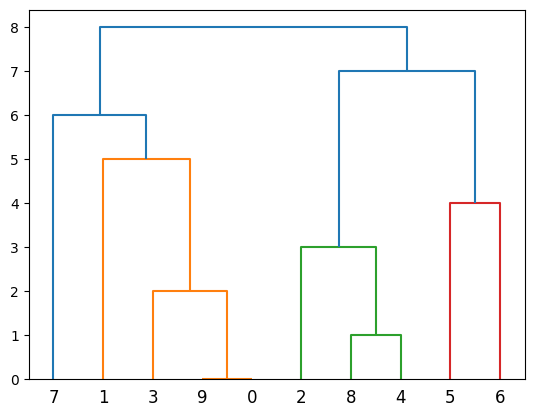

In [69]:
hierarchical_clustering_result = hierarchical_clustering.fit(target_all_df)
plot_dendrogram(hierarchical_clustering_result, labels=hierarchical_clustering_result.labels_)


In [ ]:
# 7-1: Piemonte nord da solo o con Dora
# 0-9: Ticino e Adda simili, vicino anche 3, emiliani2

In [67]:
target_all_df.index.values

array(['Adda', 'Dora', 'Emiliani1', 'Emiliani2', 'Garda_Mincio',
       'Lambro_Olona', 'Oglio_Iseo', 'Piemonte_Nord', 'Piemonte_Sud',
       'Ticino'], dtype=object)

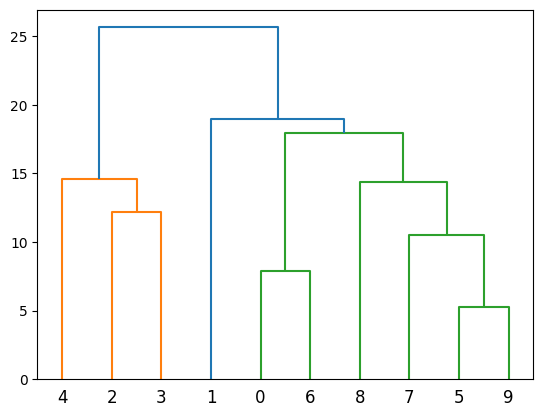

In [505]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(np.transpose(targets_df_trainVal), method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

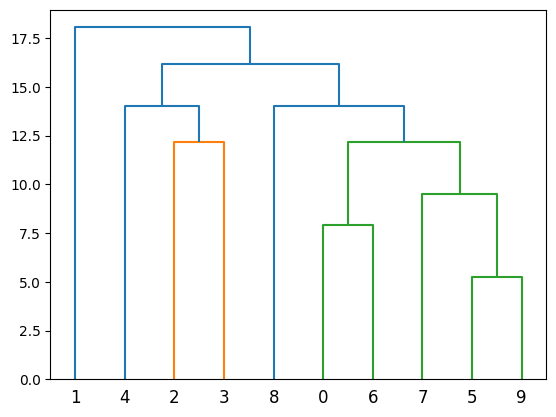

In [523]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(np.transpose(targets_df_trainVal), method='average', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [509]:
targets_df_trainVal.columns

Index(['Adda', 'Dora', 'Emiliani1', 'Emiliani2', 'Garda_Mincio',
       'Lambro_Olona', 'Oglio_Iseo', 'Piemonte_Nord', 'Piemonte_Sud',
       'Ticino'],
      dtype='object')